# LOADING DATA

In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Define file path
file_path = "/content/drive/MyDrive/AD PROJECT/GROUP 1 DATASET - Sheet1.csv"

# Load dataset
df = pd.read_csv(file_path)
df_processed=df.copy()
df.head()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Crop,Crop_Year,Season,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Severity Value,AVERAGE MEAN
0,Arhar/Tur,1997,Autumn,25621,6487,1496.6,2438350.57,7942.51,0.202778,2,24.11
1,Arhar/Tur,1997,Summer,86559,16414,1496.6,8237820.03,26833.29,0.216786,2,24.11
2,Arhar/Tur,1997,Winter,116553,23305,1496.6,11092349.01,36131.43,0.198929,2,24.11
3,Groundnut,1997,Autumn,37462,34433,1496.6,3565258.54,11613.22,0.840435,2,24.11
4,Groundnut,1997,Summer,39729,48815,1496.6,3781008.93,12315.99,1.211071,2,24.11


# PREPROCESSING

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode Crop and Season
encoder = OneHotEncoder(sparse_output=False, drop="first")  # Fix: Changed 'sparse' to 'sparse_output'
encoded_categorical = encoder.fit_transform(df_processed[["Crop", "Season"]])

# Convert encoded data to a DataFrame
encoded_columns = encoder.get_feature_names_out(["Crop", "Season"])
df_encoded = pd.DataFrame(encoded_categorical, columns=encoded_columns)

# Show encoded values for a few rows
print("\nOne-Hot Encoded Sample:\n", df_encoded.head())



One-Hot Encoded Sample:
    Crop_Bajra  Crop_Castor seed  Crop_Coriander  Crop_Cotton(lint)  \
0         0.0               0.0             0.0                0.0   
1         0.0               0.0             0.0                0.0   
2         0.0               0.0             0.0                0.0   
3         0.0               0.0             0.0                0.0   
4         0.0               0.0             0.0                0.0   

   Crop_Cowpea(Lobia)  Crop_Dry chillies  Crop_Garlic  Crop_Ginger  Crop_Gram  \
0                 0.0                0.0          0.0          0.0        0.0   
1                 0.0                0.0          0.0          0.0        0.0   
2                 0.0                0.0          0.0          0.0        0.0   
3                 0.0                0.0          0.0          0.0        0.0   
4                 0.0                0.0          0.0          0.0        0.0   

   Crop_Groundnut  ...  Crop_Sweet potato  Crop_Tobacco  Crop_Turm

In [ ]:
# Drop original categorical columns
df_numerical = df_processed.drop(columns=["Crop", "Season"])

# Merge encoded categorical data
df_final = pd.concat([df_numerical, df_encoded], axis=1)

# Show final dataset structure
print("\nFinal Processed Data (First 5 Rows):\n", df_final.head())
print("\nColumns in Final Data:\n", df_final.columns)



Final Processed Data (First 5 Rows):
    Crop_Year    Area  Production  Annual_Rainfall   Fertilizer  Pesticide  \
0       1997   25621        6487           1496.6   2438350.57    7942.51   
1       1997   86559       16414           1496.6   8237820.03   26833.29   
2       1997  116553       23305           1496.6  11092349.01   36131.43   
3       1997   37462       34433           1496.6   3565258.54   11613.22   
4       1997   39729       48815           1496.6   3781008.93   12315.99   

      Yield  Severity Value  AVERAGE MEAN  Crop_Bajra  ...  Crop_Sweet potato  \
0  0.202778               2         24.11         0.0  ...                0.0   
1  0.216786               2         24.11         0.0  ...                0.0   
2  0.198929               2         24.11         0.0  ...                0.0   
3  0.840435               2         24.11         0.0  ...                0.0   
4  1.211071               2         24.11         0.0  ...                0.0   

   Crop_Tob

In [ ]:
# Define features (X) and target (Y)
X = df_final.drop(columns=["Yield", "Severity Value"])  # Excluding Yield & Severity as targets
Y = df_final["Yield"]  # Predicting Yield

# Show feature sample
print("\nFeatures Sample:\n", X.head())
print("\nTarget Sample:\n", Y.head())



Features Sample:
    Crop_Year    Area  Production  Annual_Rainfall   Fertilizer  Pesticide  \
0       1997   25621        6487           1496.6   2438350.57    7942.51   
1       1997   86559       16414           1496.6   8237820.03   26833.29   
2       1997  116553       23305           1496.6  11092349.01   36131.43   
3       1997   37462       34433           1496.6   3565258.54   11613.22   
4       1997   39729       48815           1496.6   3781008.93   12315.99   

   AVERAGE MEAN  Crop_Bajra  Crop_Castor seed  Crop_Coriander  ...  \
0         24.11         0.0               0.0             0.0  ...   
1         24.11         0.0               0.0             0.0  ...   
2         24.11         0.0               0.0             0.0  ...   
3         24.11         0.0               0.0             0.0  ...   
4         24.11         0.0               0.0             0.0  ...   

   Crop_Sweet potato  Crop_Tobacco  Crop_Turmeric  Crop_Urad  Crop_Wheat  \
0                0.0 

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for better visualization
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Show a small sample after scaling
print("\nScaled Features Sample:\n", X_scaled_df.head())



Scaled Features Sample:
    Crop_Year      Area  Production  Annual_Rainfall  Fertilizer  Pesticide  \
0  -1.573721 -0.209800   -0.249652         0.279208   -0.214524  -0.194368   
1  -1.573721 -0.117416   -0.239694         0.279208   -0.150573  -0.092334   
2  -1.573721 -0.071944   -0.232782         0.279208   -0.119097  -0.042113   
3  -1.573721 -0.191849   -0.221620         0.279208   -0.202097  -0.174541   
4  -1.573721 -0.188412   -0.207193         0.279208   -0.199718  -0.170746   

   AVERAGE MEAN  Crop_Bajra  Crop_Castor seed  Crop_Coriander  ...  \
0     -3.354045   -0.096417         -0.136992       -0.096417  ...   
1     -3.354045   -0.096417         -0.136992       -0.096417  ...   
2     -3.354045   -0.096417         -0.136992       -0.096417  ...   
3     -3.354045   -0.096417         -0.136992       -0.096417  ...   
4     -3.354045   -0.096417         -0.136992       -0.096417  ...   

   Crop_Sweet potato  Crop_Tobacco  Crop_Turmeric  Crop_Urad  Crop_Wheat  \
0       

# TRAIN-TEST SPLIT

In [ ]:
from sklearn.model_selection import train_test_split

# Split into training (80%) and testing (20%) sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Show the number of samples in each set
print("\nTraining Samples:", X_train.shape[0])
print("Testing Samples:", X_test.shape[0])

# Verify the first few samples
print("\nX_train Sample:\n", X_train[:5])
print("\nY_train Sample:\n", Y_train[:5])



Training Samples: 608
Testing Samples: 152

X_train Sample:
 [[ 1.48405718 -0.24622893 -0.2556677   1.0370666  -0.23856374 -0.23425755
   0.47270426 -0.09641654 -0.13699181 -0.09641654 -0.06295246 -0.05136655
  -0.10947155 -0.09641654 -0.09641654 -0.09641654 -0.29277002 -0.23879624
  -0.09641654 -0.17665672 -0.09641654 -0.29541077 -0.08920516 -0.06295246
  -0.2847474  -0.14664712 -0.09641654 -0.08920516 -0.08137885 -0.0362977
  -0.17665672 -0.29277002 -0.17265659 -0.29277002 -0.09641654 -0.06295246
   3.41565026 -0.09641654 -0.0362977  -0.17665672 -0.13192022 -0.10947155
  -0.09641654 -0.09641654 -0.29277002 -0.17665672 -0.42008403 -0.35954404
  -0.52048344 -0.26252051 -0.60369895]
 [-0.11763634 -0.20092688 -0.2254294   1.0256416  -0.19511323 -0.21006738
   0.28136679 -0.09641654 -0.13699181 -0.09641654 -0.06295246 -0.05136655
  -0.10947155 -0.09641654 -0.09641654 -0.09641654  3.41565026 -0.23879624
  -0.09641654 -0.17665672 -0.09641654 -0.29541077 -0.08920516 -0.06295246
  -0.2847474

In [ ]:
import pandas as pd

# Save the training and testing sets to CSV files
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)
Y_train_df = pd.DataFrame(Y_train)
Y_test_df = pd.DataFrame(Y_test)

X_train_df.to_csv('/content/drive/MyDrive/AD PROJECT/X_train.csv', index=False)
X_test_df.to_csv('/content/drive/MyDrive/AD PROJECT/X_test.csv', index=False)
Y_train_df.to_csv('/content/drive/MyDrive/AD PROJECT/Y_train.csv', index=False)
Y_test_df.to_csv('/content/drive/MyDrive/AD PROJECT/Y_test.csv', index=False)

# Display the saved files' sample (first few rows)
print("\nSample of X_train:\n", X_train_df.head(5))
print("\nSample of Y_train:\n", Y_train_df.head(5))



Sample of X_train:
          0         1         2         3         4         5         6   \
0  1.484057 -0.246229 -0.255668  1.037067 -0.238564 -0.234258  0.472704   
1 -0.117636 -0.200927 -0.225429  1.025642 -0.195113 -0.210067  0.281367   
2 -0.554462 -0.166733 -0.181856 -0.842618 -0.176865 -0.175984  0.166564   
3 -1.282504 -0.248551 -0.256149  0.212290 -0.241341 -0.237180 -0.407448   
4 -0.117636 -0.244285 -0.249644  1.025642 -0.237184 -0.234783  0.281367   

         7         8         9   ...        41        42        43       44  \
0 -0.096417 -0.136992 -0.096417  ... -0.109472 -0.096417 -0.096417 -0.29277   
1 -0.096417 -0.136992 -0.096417  ... -0.109472 -0.096417 -0.096417 -0.29277   
2 -0.096417 -0.136992 -0.096417  ... -0.109472 -0.096417 -0.096417 -0.29277   
3 -0.096417 -0.136992 -0.096417  ... -0.109472 -0.096417 -0.096417 -0.29277   
4 -0.096417 -0.136992 -0.096417  ... -0.109472 -0.096417 -0.096417 -0.29277   

         45        46        47        48        49  

# MODEL - RANDOM FOREST

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam


# Split into training (80%) and testing (20%) sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)



# Build and train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train Random Forest
rf_model.fit(X_train, Y_train)

# Make predictions using Random Forest
rf_predictions = rf_model.predict(X_test)

# Evaluate Random Forest
rf_mae = mean_absolute_error(Y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(Y_test, rf_predictions))
print("Random Forest MAE:", rf_mae)
print("Random Forest RMSE:", rf_rmse)


Random Forest MAE: 0.361806311843618
Random Forest RMSE: 1.2177059806932629


In [ ]:
from sklearn.metrics import r2_score

# Calculate R² for both models
rf_r2 = r2_score(Y_test, rf_predictions)

# Calculate Accuracy in percentage for both models (Relative MAE)
rf_accuracy_percent = (1 - (rf_mae / Y_test.mean())) * 100

# Print the results
print("Random Forest R²: ", rf_r2)

print("Random Forest Accuracy (in %): ", rf_accuracy_percent)


Random Forest R²:  0.988744051981576
Random Forest Accuracy (in %):  90.58432654047508


In [ ]:

# Calculate Mean Absolute Percentage Error (MAPE) for Random Forest
rf_mape = np.mean(np.abs((Y_test.values.flatten() - rf_predictions) / Y_test.values.flatten())) * 100

# Print results
print("Random Forest MAPE (in %):", rf_mape)


Random Forest MAPE (in %): 13.471292714236913


Random Forest MAE: 0.361806311843618
Random Forest RMSE: 1.2177059806932629
Random Forest R²: 0.988744051981576
Random Forest Accuracy (in %): 90.58432654047508
Random Forest MAPE (in %): 13.471292714236913


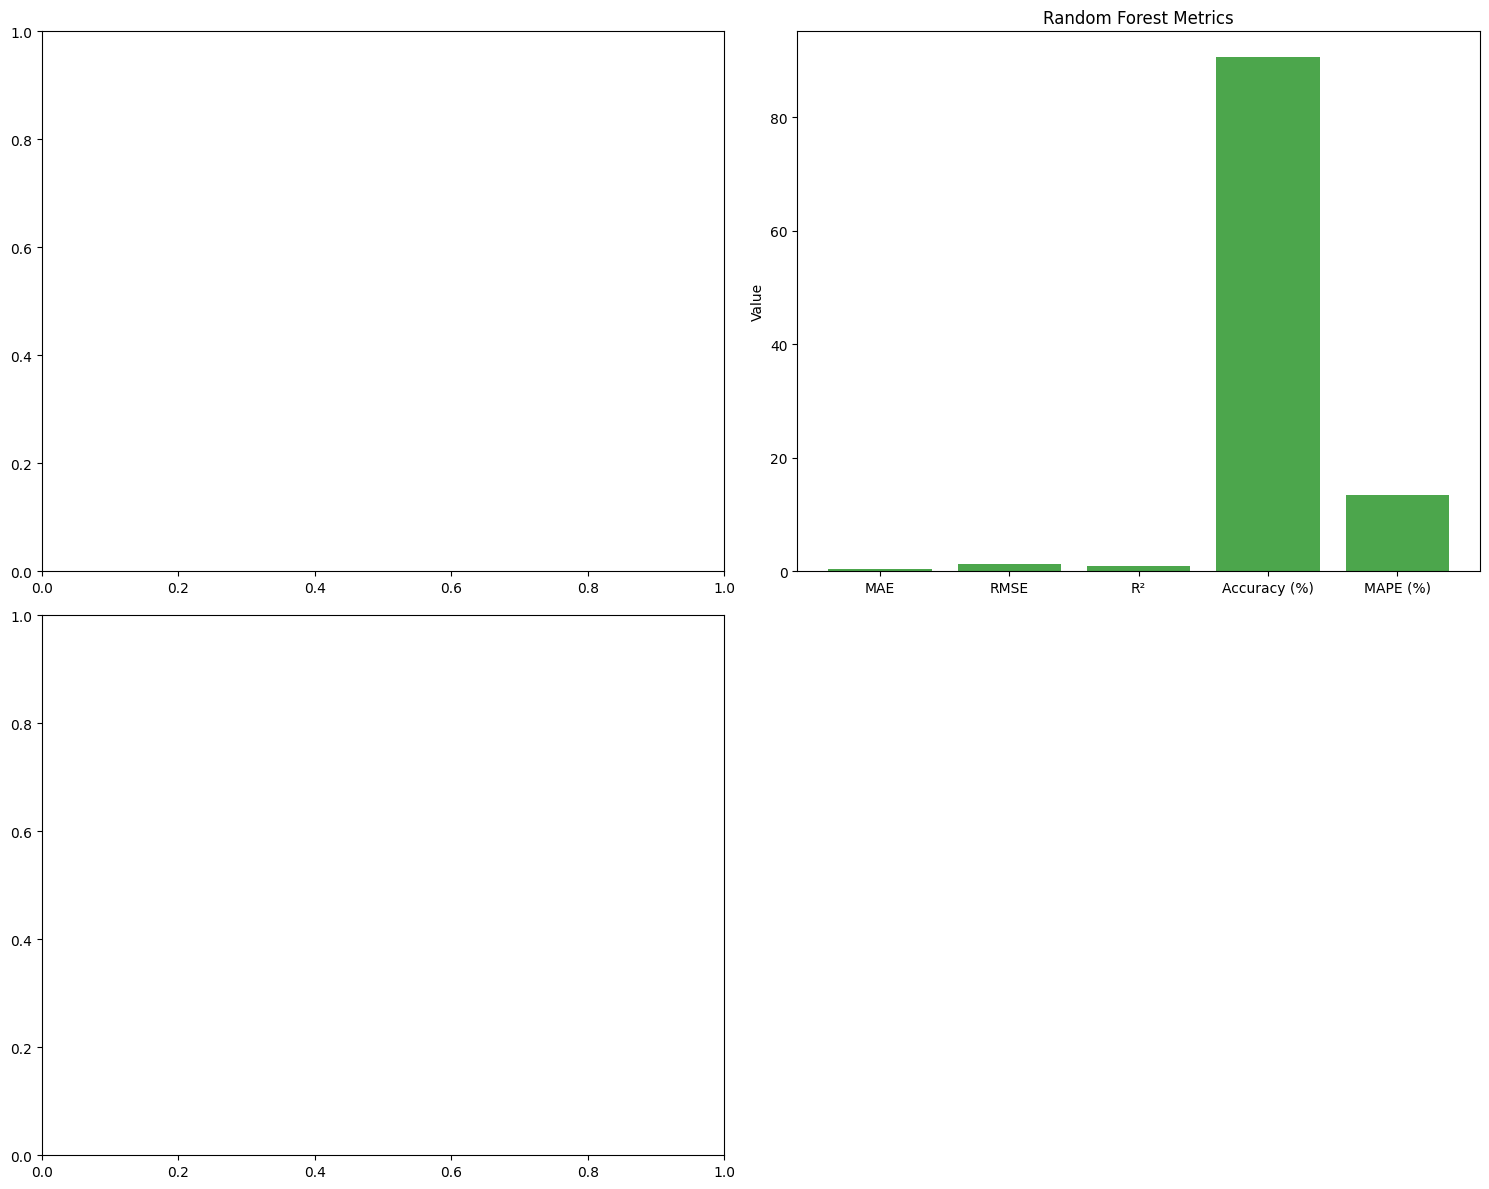

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns


# Evaluate Random Forest
rf_mae = mean_absolute_error(Y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(Y_test, rf_predictions))
rf_r2 = r2_score(Y_test, rf_predictions)
rf_accuracy_percent = (1 - (rf_mae / Y_test.mean())) * 100
rf_mape = np.mean(np.abs((Y_test.values.flatten() - rf_predictions) / Y_test.values.flatten())) * 100

print("Random Forest MAE:", rf_mae)
print("Random Forest RMSE:", rf_rmse)
print("Random Forest R²:", rf_r2)
print("Random Forest Accuracy (in %):", rf_accuracy_percent)
print("Random Forest MAPE (in %):", rf_mape)



# Step 2: Visualizing Metrics - MAE, RMSE, R², Accuracy, and MAPE
metrics = ['MAE', 'RMSE', 'R²', 'Accuracy (%)', 'MAPE (%)']
rf_values = [rf_mae, rf_rmse, rf_r2, rf_accuracy_percent, rf_mape]

fig, ax = plt.subplots(2, 2, figsize=(15, 12))

# Plotting MAE, RMSE, R², Accuracy, and MAPE for and Random Forest


ax[0, 1].bar(metrics, rf_values, color='green', alpha=0.7, label='Random Forest')
ax[0, 1].set_title('Random Forest Metrics')
ax[0, 1].set_ylabel('Value')





# Remove empty plots
fig.delaxes(ax[1, 1])

plt.tight_layout()
plt.show()




In [ ]:
# Display first 10 sample predictions for Random Forest models
import pandas as pd

# Combine true values with predictions
results_df = pd.DataFrame({
    'True Values': Y_test.values.flatten(),
    'Random Forest Predictions': rf_predictions.flatten()
})

# Display the first 10 samples of true values and predictions
print("Sample Predictions:")
print(results_df.head(10))


Sample Predictions:
   True Values  Random Forest Predictions
0     1.102800                   1.250577
1     1.639667                   1.554740
2     1.983200                   2.008623
3    59.612143                  63.976479
4     3.123000                   3.036764
5     0.270435                   0.323954
6     8.963333                   8.706082
7    58.854286                  57.500076
8     1.982333                   1.946753
9     0.269500                   0.243419


# MODEL ARCHITECTURE

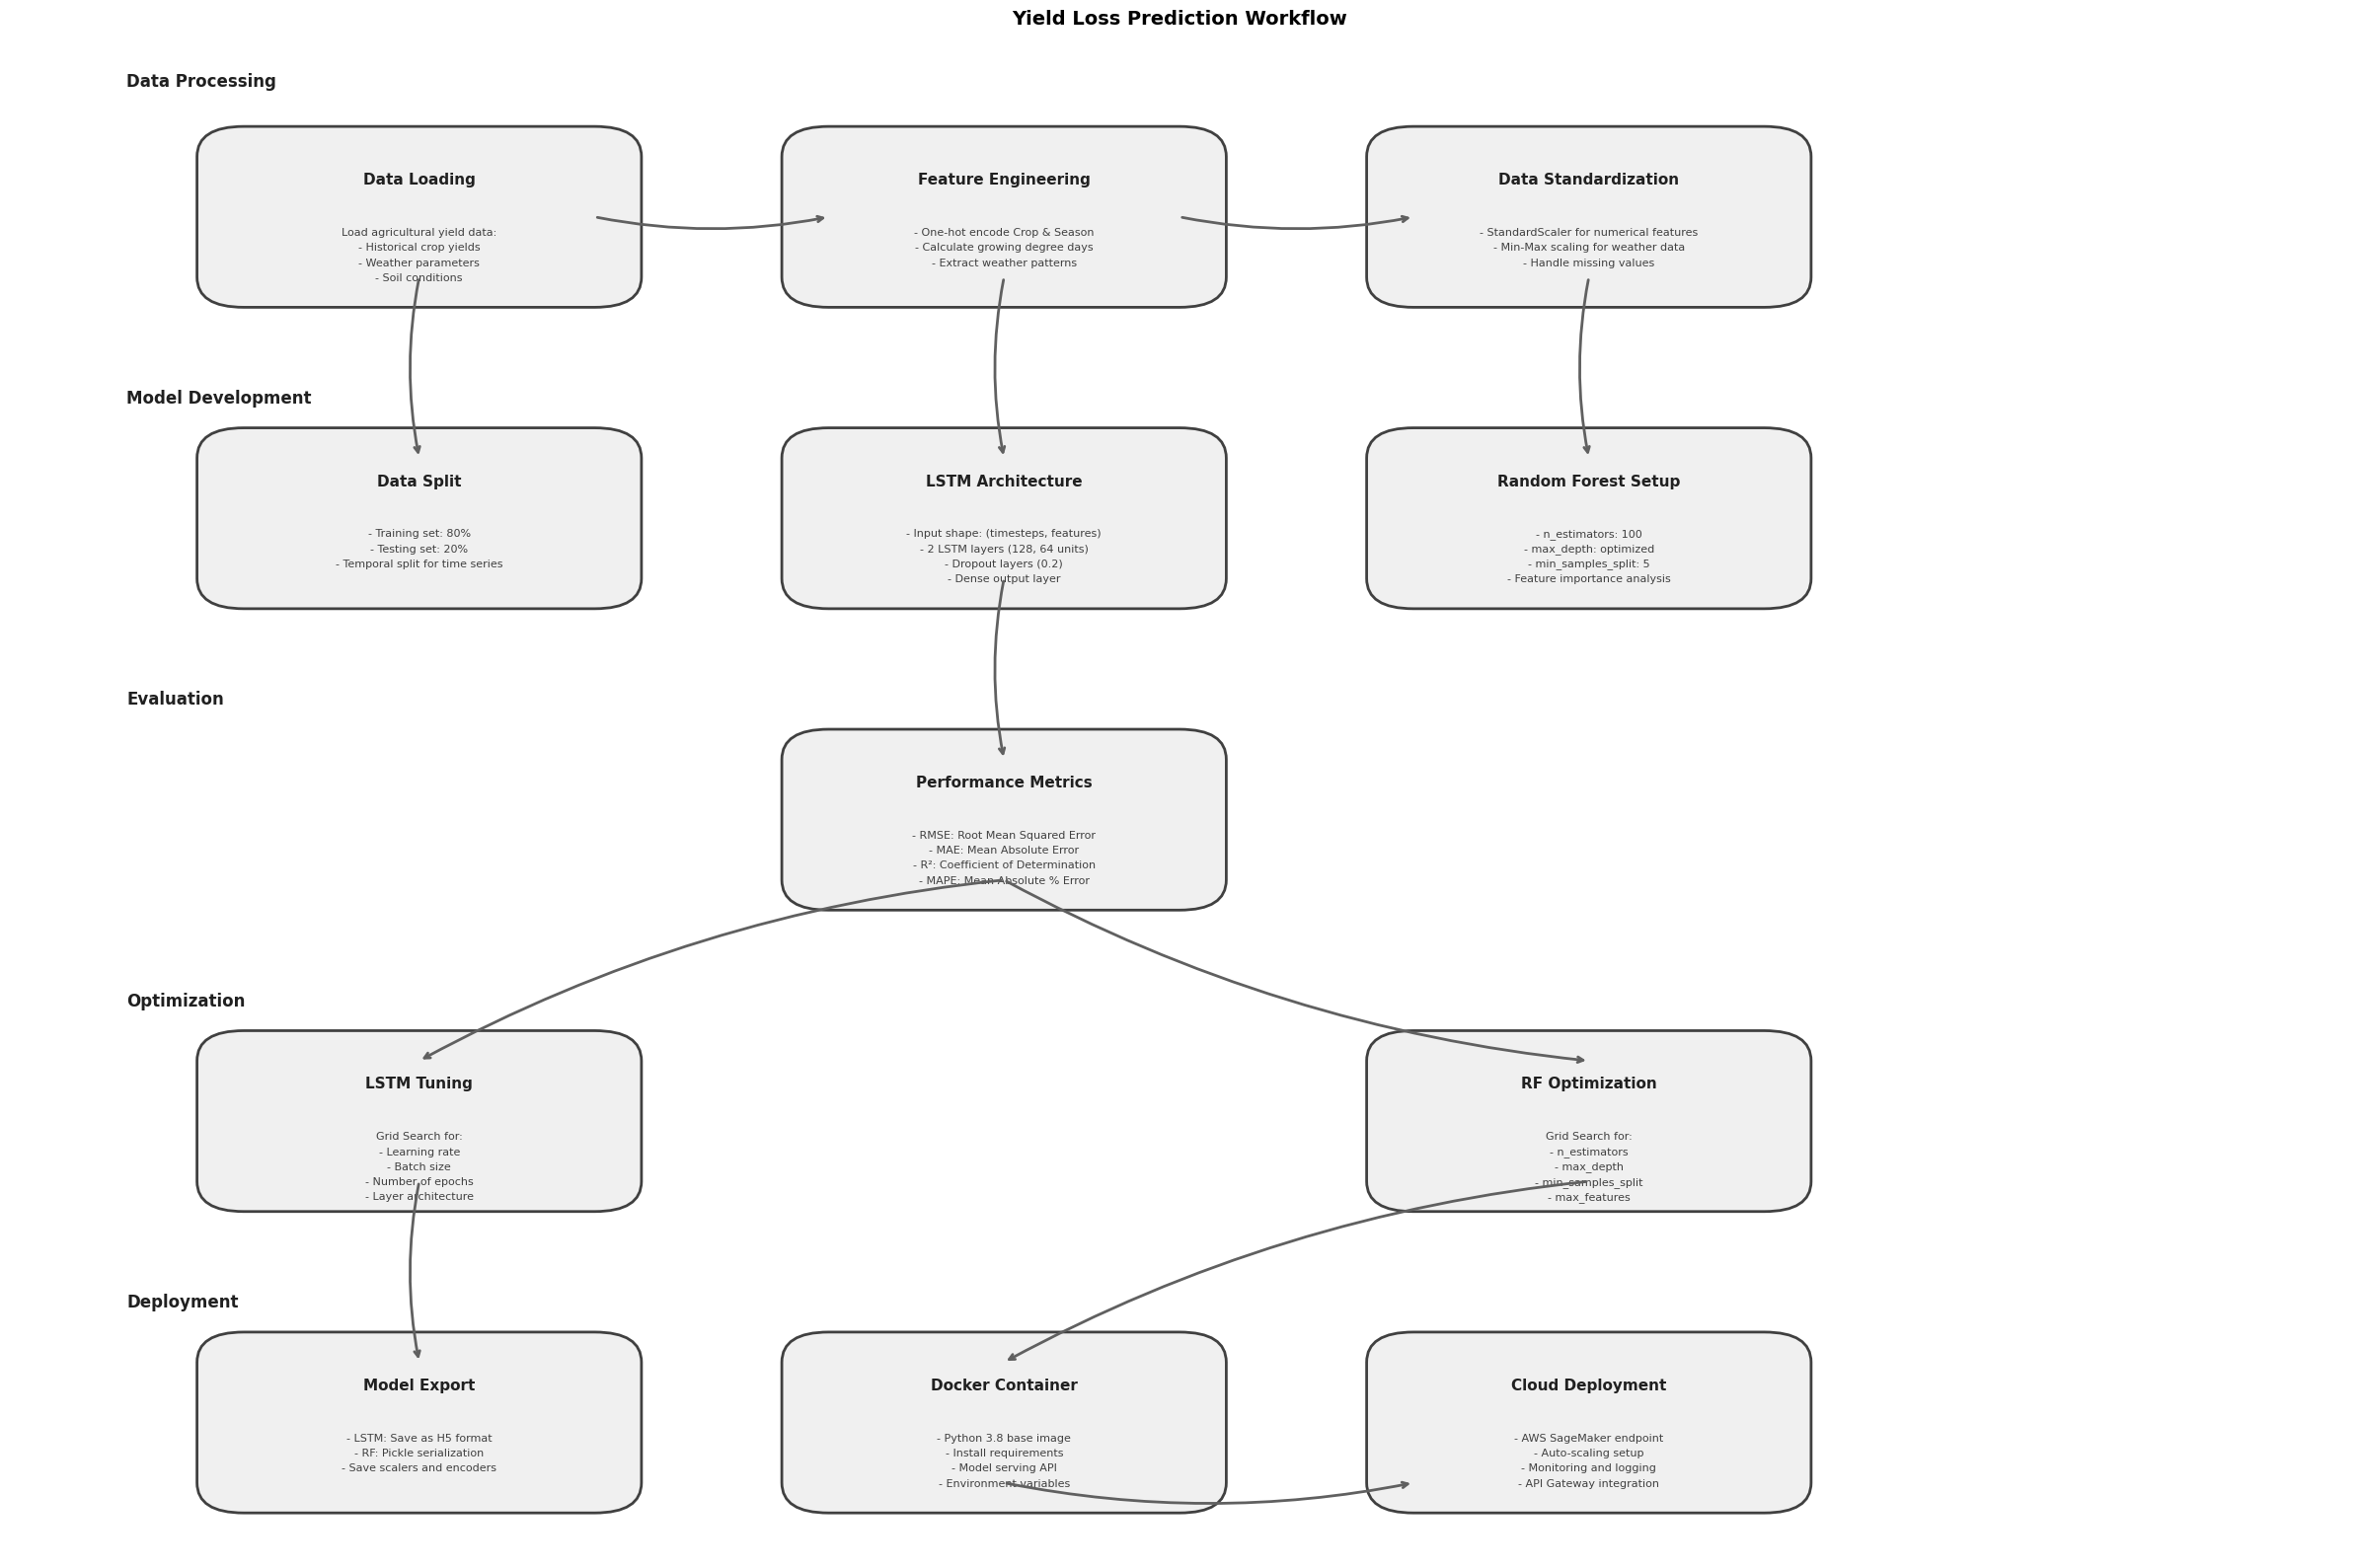

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a figure and axis with a larger figure size for better spacing
fig, ax = plt.subplots(figsize=(24, 16))

# Define the positions, sizes, and descriptions of the boxes with smaller sizes and more specific content
boxes = [
    # Data Processing Phase
    {"name": "Data Loading",
     "description": "Load agricultural yield data:\n- Historical crop yields\n- Weather parameters\n- Soil conditions",
     "xy": (0.1, 0.85), "width": 0.15, "height": 0.08},

    {"name": "Feature Engineering",
     "description": "- One-hot encode Crop & Season\n- Calculate growing degree days\n- Extract weather patterns",
     "xy": (0.35, 0.85), "width": 0.15, "height": 0.08},

    {"name": "Data Standardization",
     "description": "- StandardScaler for numerical features\n- Min-Max scaling for weather data\n- Handle missing values",
     "xy": (0.6, 0.85), "width": 0.15, "height": 0.08},

    # Model Development Phase
    {"name": "Data Split",
     "description": "- Training set: 80%\n- Testing set: 20%\n- Temporal split for time series",
     "xy": (0.1, 0.65), "width": 0.15, "height": 0.08},

    {"name": "LSTM Architecture",
     "description": "- Input shape: (timesteps, features)\n- 2 LSTM layers (128, 64 units)\n- Dropout layers (0.2)\n- Dense output layer",
     "xy": (0.35, 0.65), "width": 0.15, "height": 0.08},

    {"name": "Random Forest Setup",
     "description": "- n_estimators: 100\n- max_depth: optimized\n- min_samples_split: 5\n- Feature importance analysis",
     "xy": (0.6, 0.65), "width": 0.15, "height": 0.08},

    # Model Evaluation Phase
    {"name": "Performance Metrics",
     "description": "- RMSE: Root Mean Squared Error\n- MAE: Mean Absolute Error\n- R²: Coefficient of Determination\n- MAPE: Mean Absolute % Error",
     "xy": (0.35, 0.45), "width": 0.15, "height": 0.08},

    # Optimization Phase
    {"name": "LSTM Tuning",
     "description": "Grid Search for:\n- Learning rate\n- Batch size\n- Number of epochs\n- Layer architecture",
     "xy": (0.1, 0.25), "width": 0.15, "height": 0.08},

    {"name": "RF Optimization",
     "description": "Grid Search for:\n- n_estimators\n- max_depth\n- min_samples_split\n- max_features",
     "xy": (0.6, 0.25), "width": 0.15, "height": 0.08},

    # Deployment Phase
    {"name": "Model Export",
     "description": "- LSTM: Save as H5 format\n- RF: Pickle serialization\n- Save scalers and encoders",
     "xy": (0.1, 0.05), "width": 0.15, "height": 0.08},

    {"name": "Docker Container",
     "description": "- Python 3.8 base image\n- Install requirements\n- Model serving API\n- Environment variables",
     "xy": (0.35, 0.05), "width": 0.15, "height": 0.08},

    {"name": "Cloud Deployment",
     "description": "- AWS SageMaker endpoint\n- Auto-scaling setup\n- Monitoring and logging\n- API Gateway integration",
     "xy": (0.6, 0.05), "width": 0.15, "height": 0.08},
]

# Add boxes with improved styling
for box in boxes:
    # Add main box
    ax.add_patch(patches.FancyBboxPatch(
        box["xy"], box["width"], box["height"],
        boxstyle="round,pad=0.02",
        facecolor='#f0f0f0',
        edgecolor='#404040',
        linewidth=2
    ))

    # Add title with better positioning and styling
    ax.text(box["xy"][0] + box["width"]/2,
            box["xy"][1] + box["height"] - 0.015,
            box["name"],
            ha="center", va="center",
            fontsize=11,
            fontweight='bold',
            color='#202020')

    # Add description with better formatting
    desc_lines = box["description"].split('\n')
    for i, line in enumerate(desc_lines):
        ax.text(box["xy"][0] + box["width"]/2,
                box["xy"][1] + box["height"]/2 - 0.01 - (i * 0.01),
                line,
                ha="center", va="center",
                fontsize=8,
                color='#404040')

# Define arrows with improved positioning
arrows = [
    # Data Processing Flow
    {"start": (0.25, 0.89), "end": (0.35, 0.89)},
    {"start": (0.5, 0.89), "end": (0.6, 0.89)},

    # Model Development Flow
    {"start": (0.175, 0.85), "end": (0.175, 0.73)},
    {"start": (0.425, 0.85), "end": (0.425, 0.73)},
    {"start": (0.675, 0.85), "end": (0.675, 0.73)},

    # Evaluation Flow
    {"start": (0.425, 0.65), "end": (0.425, 0.53)},

    # Optimization Flow
    {"start": (0.425, 0.45), "end": (0.175, 0.33)},
    {"start": (0.425, 0.45), "end": (0.675, 0.33)},

    # Deployment Flow
    {"start": (0.175, 0.25), "end": (0.175, 0.13)},
    {"start": (0.675, 0.25), "end": (0.425, 0.13)},
    {"start": (0.425, 0.05), "end": (0.6, 0.05)},
]

# Add arrows with improved styling
for arrow in arrows:
    ax.annotate("",
                xy=arrow["end"],
                xytext=arrow["start"],
                arrowprops=dict(arrowstyle="->",
                              connectionstyle="arc3,rad=0.1",
                              color='#606060',
                              lw=2))

# Add phase labels
phases = [
    {"name": "Data Processing", "xy": (0.05, 0.98)},
    {"name": "Model Development", "xy": (0.05, 0.77)},
    {"name": "Evaluation", "xy": (0.05, 0.57)},
    {"name": "Optimization", "xy": (0.05, 0.37)},
    {"name": "Deployment", "xy": (0.05, 0.17)}
]

for phase in phases:
    ax.text(phase["xy"][0], phase["xy"][1],
            phase["name"],
            ha="left", va="center",
            fontsize=12,
            fontweight='bold',
            color='#202020')

# Set plot limits and remove axes
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis("off")

# Add title
plt.title("Yield Loss Prediction Workflow", pad=20, fontsize=14, fontweight='bold')

# Adjust layout and display
plt.tight_layout()
plt.show()

# MODEL - LSTM

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 77.6909 - val_loss: 65.1198 - learning_rate: 0.0010
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 127.2699 - val_loss: 64.8098 - learning_rate: 0.0010
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 92.9650 - val_loss: 64.6070 - learning_rate: 0.0010
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 50.6031 - val_loss: 64.4150 - learning_rate: 0.0010
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 55.6490 - val_loss: 64.3900 - learning_rate: 0.0010
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 95.5898 - val_loss: 64.4689 - learning_rate: 0.0010
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 55.8869 - val_loss: 64.4971 - learning_rate: 0.0010
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 48.5509 - val_loss: 64.4848 - learning_rate: 0.0010
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 39.3405 - val_loss: 64.2304 - learning_rate: 0.0010
Epo

1/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step

LSTM Model Performance:
MAE: 1.1971
RMSE: 1.9908
R²: 0.9699
Accuracy (%): 68.85
MAPE (%): 108.40


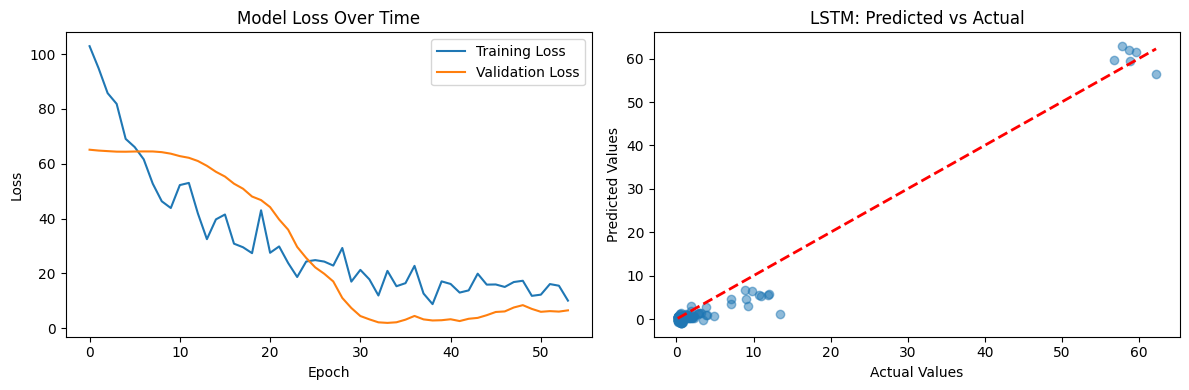

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Assuming previous data loading and preprocessing steps remain the same
# ...

# Reshape data for LSTM (keeping your original reshape)
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build improved LSTM Model
lstm_model = Sequential([
    # First LSTM layer with more units and return sequences
    LSTM(128, activation='relu', return_sequences=True,
         input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    BatchNormalization(),
    Dropout(0.3),

    # Second LSTM layer
    LSTM(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    # Dense layers for better feature extraction
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),

    Dense(16, activation='relu'),
    BatchNormalization(),

    # Output layer
    Dense(1)
])

# Compile with a lower learning rate
optimizer = Adam(learning_rate=0.001)
lstm_model.compile(optimizer=optimizer, loss='mse')

# Add callbacks for better training
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=0.0001,
    verbose=1
)

# Train the model with validation split and callbacks
history = lstm_model.fit(
    X_train_lstm,
    Y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Make predictions
lstm_predictions = lstm_model.predict(X_test_lstm)

# Evaluate LSTM
lstm_mae = mean_absolute_error(Y_test, lstm_predictions)
lstm_rmse = np.sqrt(mean_squared_error(Y_test, lstm_predictions))
lstm_r2 = r2_score(Y_test, lstm_predictions)
lstm_accuracy_percent = (1 - (lstm_mae / Y_test.mean())) * 100
lstm_mape = np.mean(np.abs((Y_test.values.flatten() - lstm_predictions.flatten()) / Y_test.values.flatten())) * 100

print("\nLSTM Model Performance:")
print(f"MAE: {lstm_mae:.4f}")
print(f"RMSE: {lstm_rmse:.4f}")
print(f"R²: {lstm_r2:.4f}")
print(f"Accuracy (%): {lstm_accuracy_percent:.2f}")
print(f"MAPE (%): {lstm_mape:.2f}")

# Plotting training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(Y_test, lstm_predictions, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('LSTM: Predicted vs Actual')

plt.tight_layout()
plt.show()

#VISUALISATIONS

## **RF VISUALISATION**







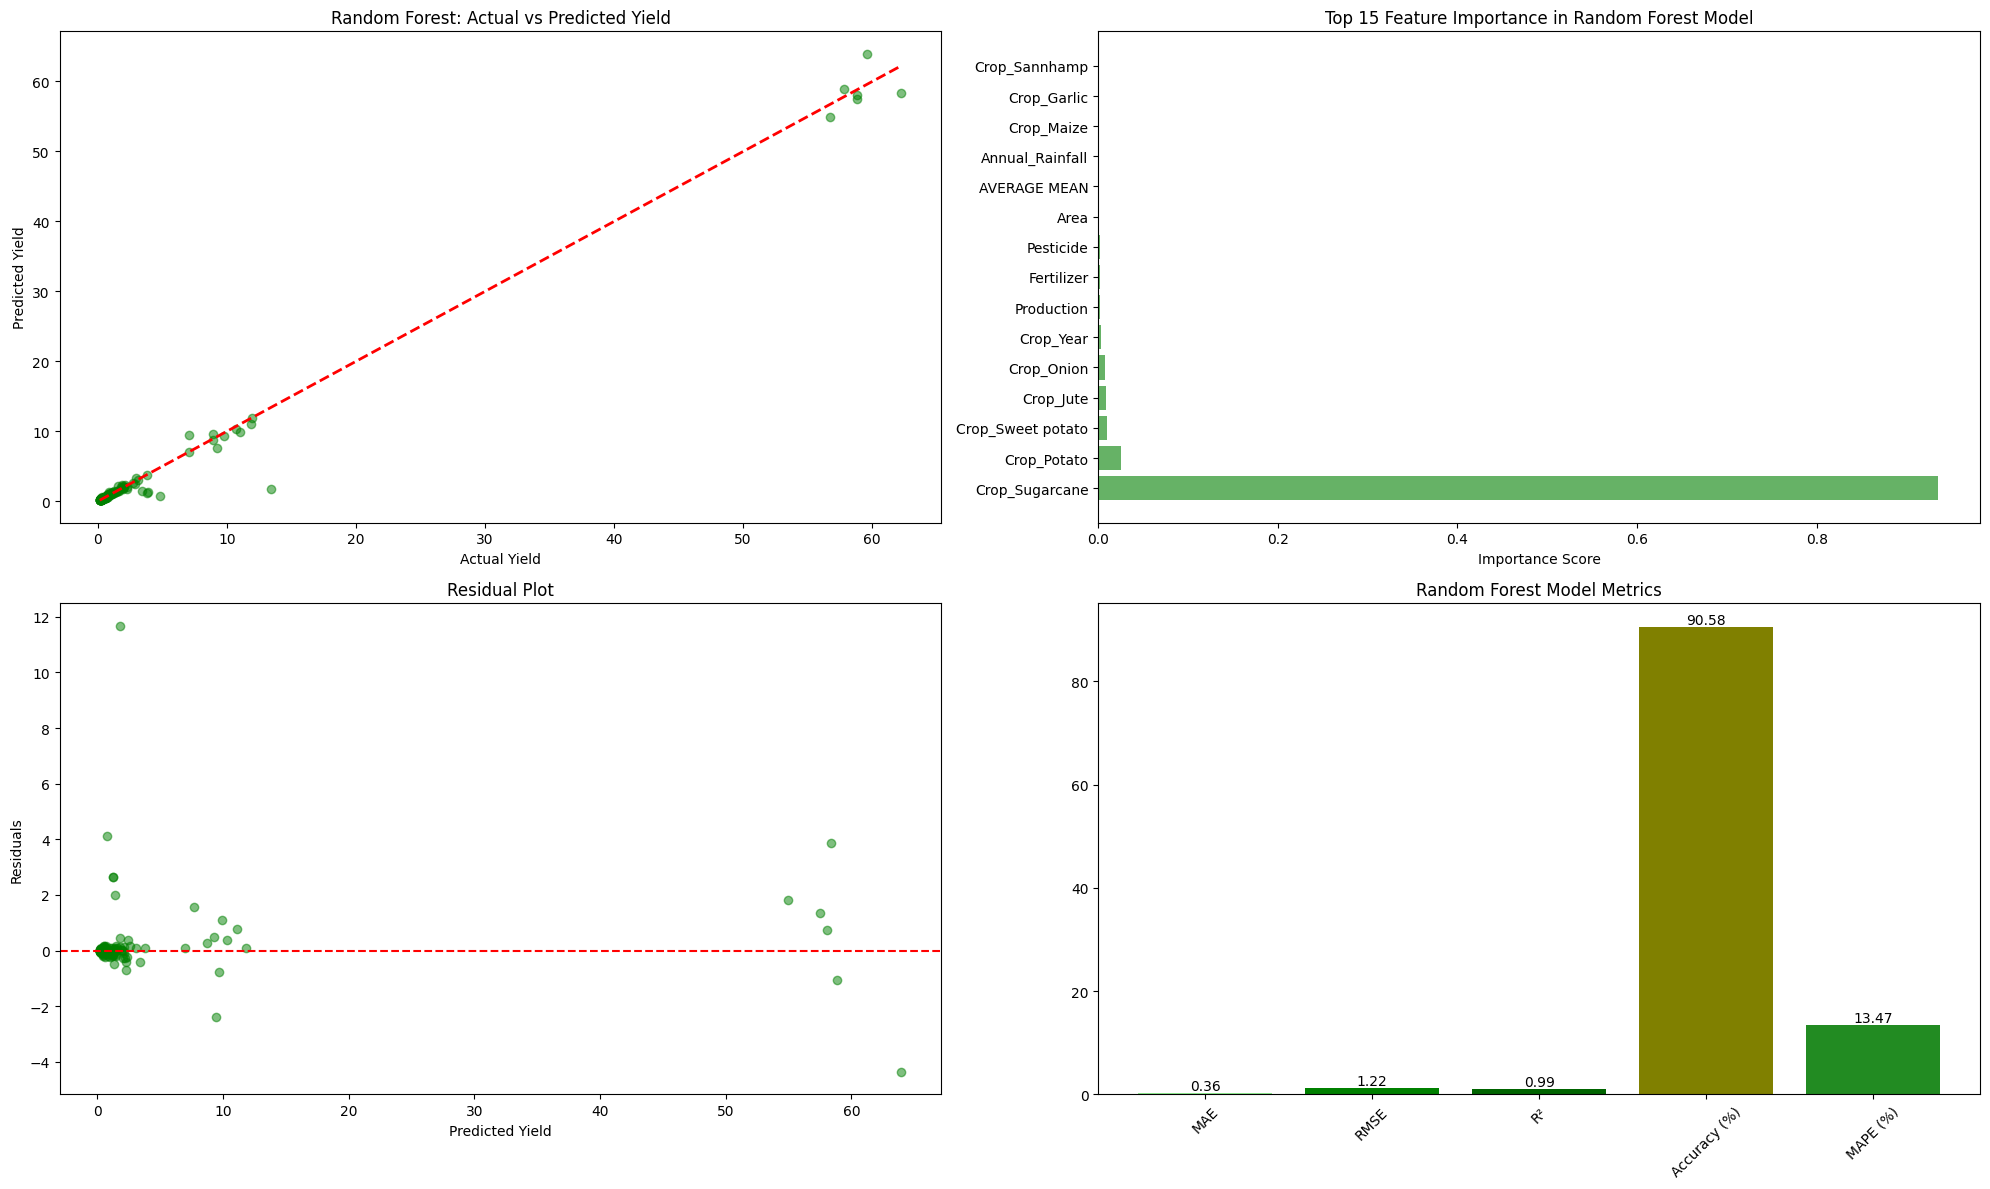

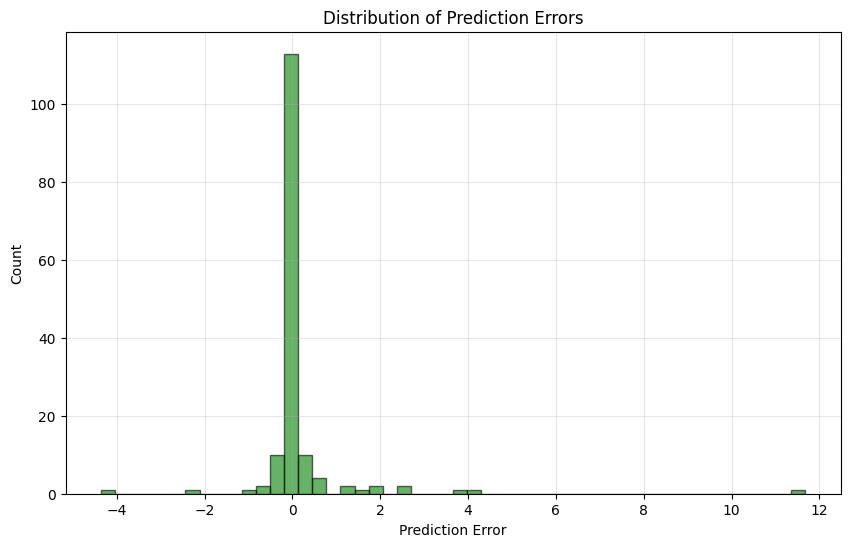

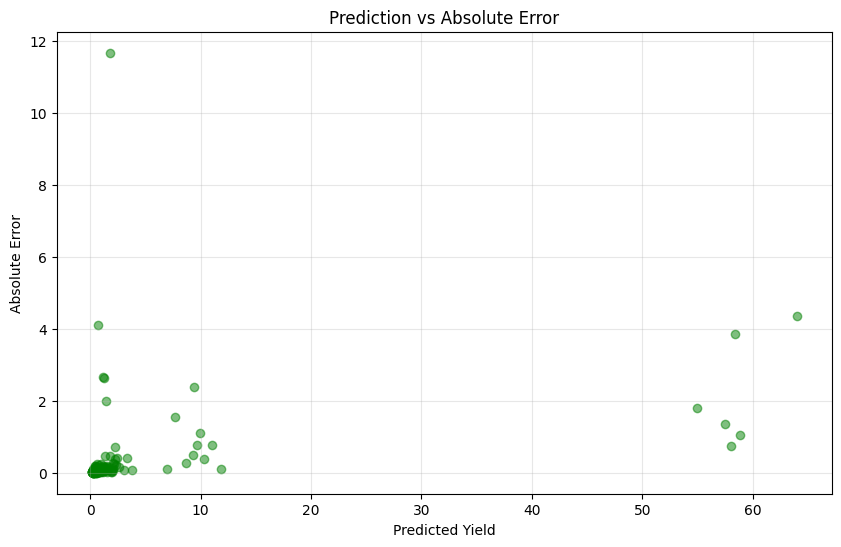

<ipython-input-42-fb62f7e8e319>:96: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])


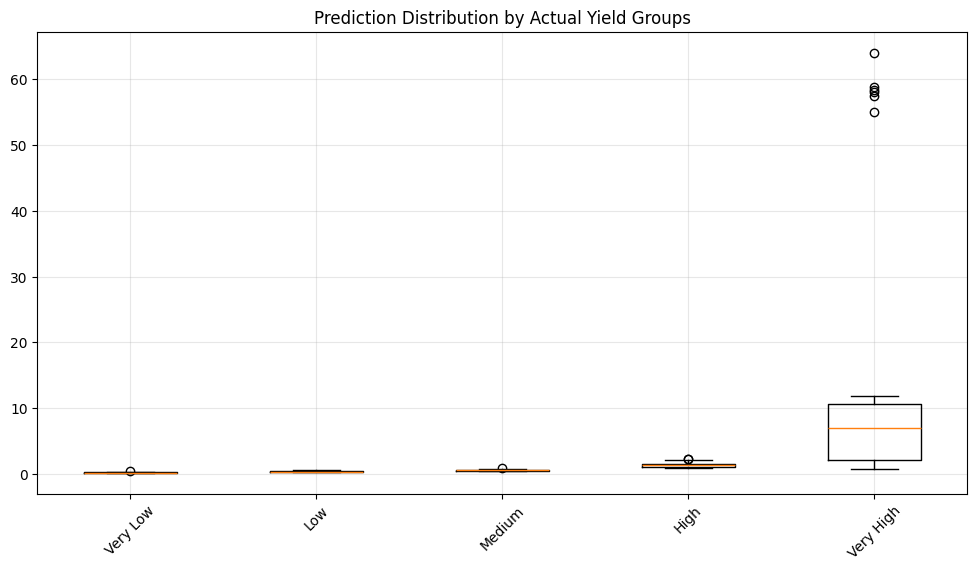

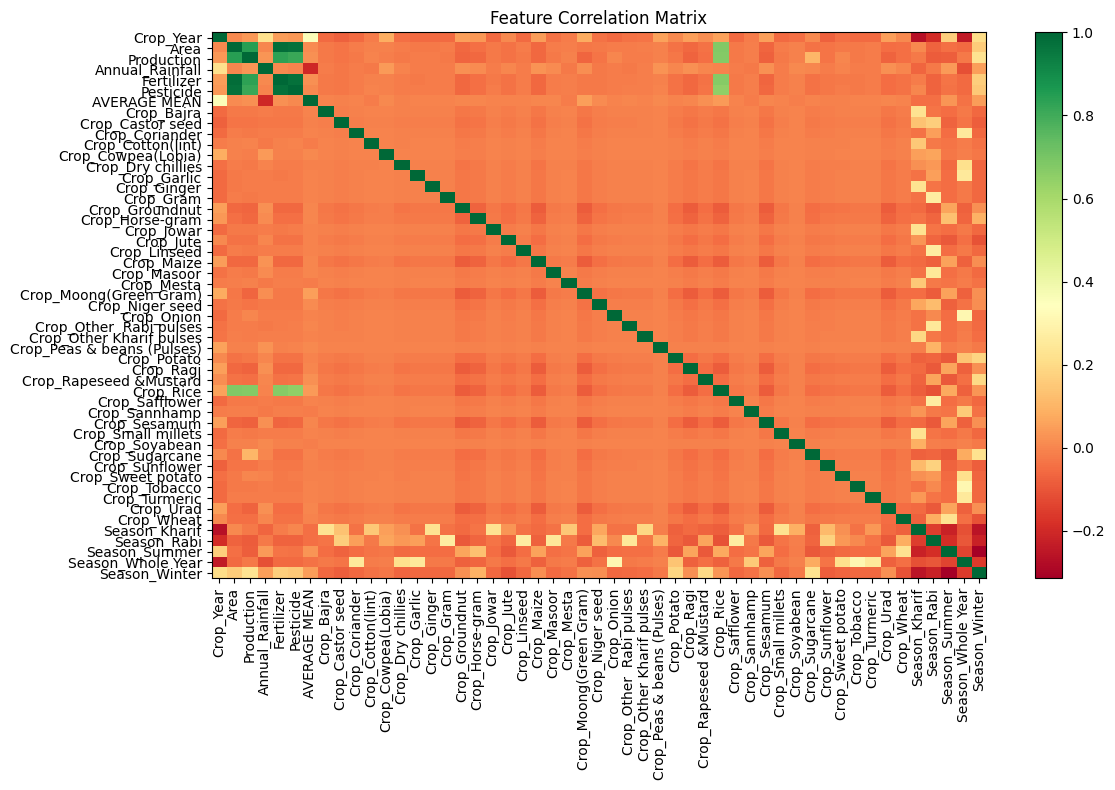


Random Forest Model Performance Metrics:
Mean Absolute Error (MAE): 0.3618
Root Mean Square Error (RMSE): 1.2177
R² Score: 0.9887
Model Accuracy: 90.58%
Mean Absolute Percentage Error (MAPE): 13.47%


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate metrics
rf_mae = mean_absolute_error(Y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(Y_test, rf_predictions))
rf_r2 = r2_score(Y_test, rf_predictions)
rf_accuracy_percent = (1 - (rf_mae / Y_test.mean())) * 100
rf_mape = np.mean(np.abs((Y_test.values.flatten() - rf_predictions) / Y_test.values.flatten())) * 100

# Create a figure with multiple subplots
plt.style.use('default')
fig = plt.figure(figsize=(20, 12))

# 1. Actual vs Predicted Values Scatter Plot
ax1 = plt.subplot(2, 2, 1)
plt.scatter(Y_test, rf_predictions, alpha=0.5, color='green')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Random Forest: Actual vs Predicted Yield')

# 2. Feature Importance Plot (top 15 features)
ax2 = plt.subplot(2, 2, 2)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(15)
plt.barh(range(len(feature_importance)), feature_importance['importance'], color='green', alpha=0.6)
plt.yticks(range(len(feature_importance)), feature_importance['feature'])
plt.title('Top 15 Feature Importance in Random Forest Model')
plt.xlabel('Importance Score')

# 3. Residuals Plot
ax3 = plt.subplot(2, 2, 3)
residuals = Y_test - rf_predictions
plt.scatter(rf_predictions, residuals, alpha=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Yield')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# 4. Metrics Display
ax4 = plt.subplot(2, 2, 4)
metrics = ['MAE', 'RMSE', 'R²', 'Accuracy (%)', 'MAPE (%)']
values = [rf_mae, rf_rmse, rf_r2, rf_accuracy_percent, rf_mape]
colors = ['lightgreen', 'green', 'darkgreen', 'olive', 'forestgreen']
bars = plt.bar(metrics, values, color=colors)
plt.xticks(rotation=45)
plt.title('Random Forest Model Metrics')

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 5. Error Distribution
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, color='green', alpha=0.6, edgecolor='black')
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.show()

# 6. Prediction vs Error Relationship
plt.figure(figsize=(10, 6))
plt.scatter(rf_predictions, np.abs(residuals), alpha=0.5, color='green')
plt.title('Prediction vs Absolute Error')
plt.xlabel('Predicted Yield')
plt.ylabel('Absolute Error')
plt.grid(True, alpha=0.3)
plt.show()

# 7. Create a boxplot of predictions grouped by actual yield ranges
def create_yield_groups(y):
    return pd.qcut(y, q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

results_df = pd.DataFrame({
    'Actual': Y_test,
    'Predicted': rf_predictions,
    'Yield_Group': create_yield_groups(Y_test)
})

plt.figure(figsize=(12, 6))
box_data = [results_df[results_df['Yield_Group'] == group]['Predicted']
            for group in ['Very Low', 'Low', 'Medium', 'High', 'Very High']]
plt.boxplot(box_data, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
plt.title('Prediction Distribution by Actual Yield Groups')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

# 8. Correlation Matrix
numeric_features = X.select_dtypes(include=[np.number]).columns
correlation_matrix = X[numeric_features].corr()

plt.figure(figsize=(12, 8))
im = plt.imshow(correlation_matrix, cmap='RdYlGn', aspect='auto')
plt.colorbar(im)
plt.xticks(range(len(numeric_features)), numeric_features, rotation=90)
plt.yticks(range(len(numeric_features)), numeric_features)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Print detailed metrics
print("\nRandom Forest Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {rf_mae:.4f}")
print(f"Root Mean Square Error (RMSE): {rf_rmse:.4f}")
print(f"R² Score: {rf_r2:.4f}")
print(f"Model Accuracy: {rf_accuracy_percent:.2f}%")
print(f"Mean Absolute Percentage Error (MAPE): {rf_mape:.2f}%")

# Save feature importance to CSV
feature_importance.to_csv('random_forest_feature_importance.csv', index=False)

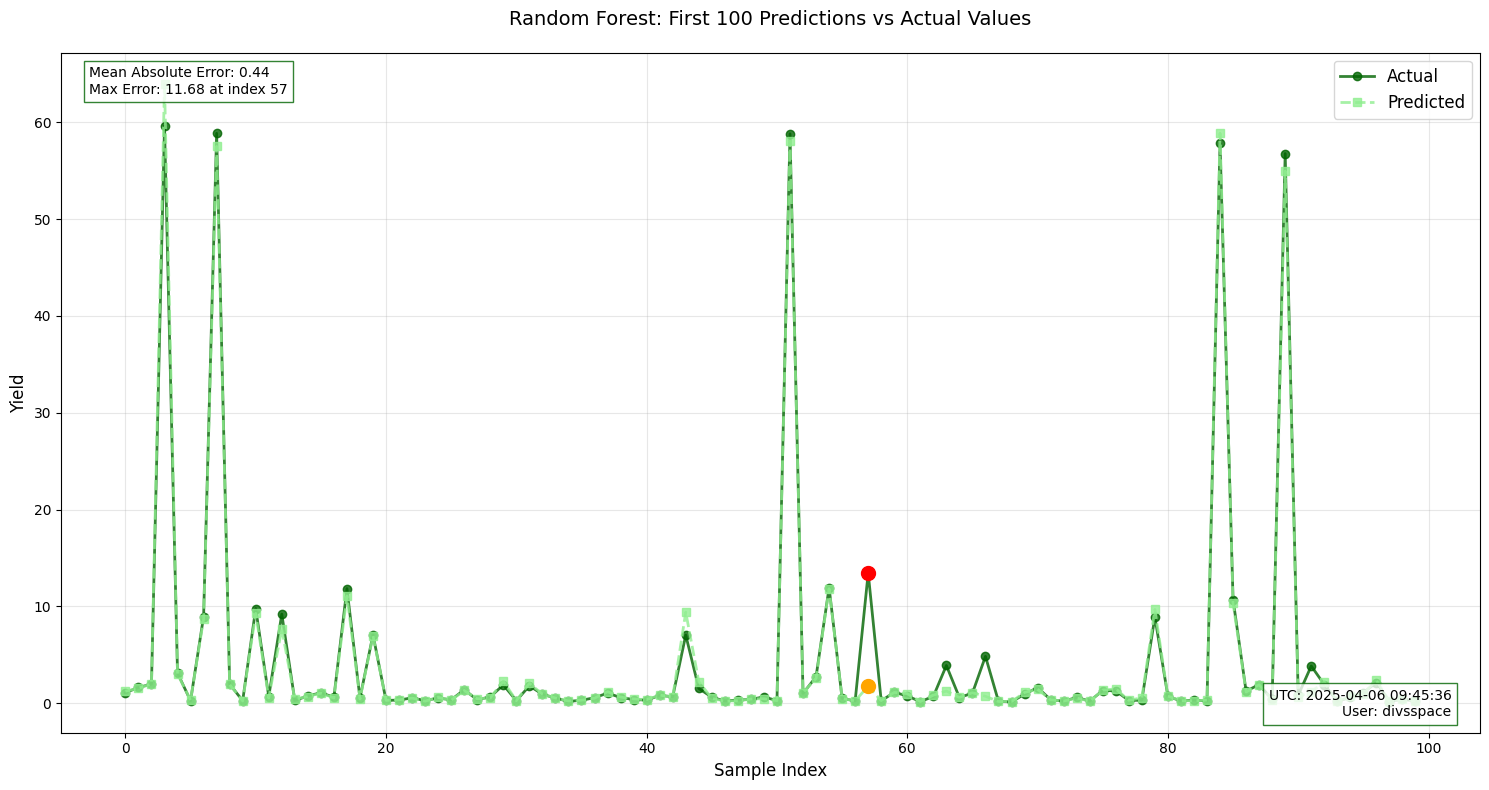


Analysis Information:
Date and Time (UTC): 2025-04-06 09:45:36
User: divsspace

First 100 Predictions Statistics:
Average Actual Yield: 4.67
Average Predicted Yield: 4.49
Standard Deviation of Error: 1.36
Median Absolute Error: 0.07


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

def visualize_rf_first_100(Y_test, rf_predictions, user_login="divsspace", save_path=None):
    """
    Visualize the first 100 predictions vs actual values for Random Forest model

    Parameters:
        Y_test: array-like, actual test values
        rf_predictions: array-like, Random Forest predictions
        user_login: str, username of current user
        save_path: str, optional path to save the plot
    """

    # Convert inputs to numpy arrays if they aren't already
    Y_test_array = np.array(Y_test).flatten()[:100]
    rf_predictions_array = np.array(rf_predictions).flatten()[:100]

    # Get current UTC time and format it
    current_time = datetime.utcnow().strftime("%Y-%m-%d %H:%M:%S")

    # Create figure
    plt.figure(figsize=(15, 8))

    # Plot first 100 values
    plt.plot(Y_test_array, label='Actual', color='darkgreen', alpha=0.8, marker='o',
             linestyle='-', markersize=6, linewidth=2)
    plt.plot(rf_predictions_array, label='Predicted', color='lightgreen', alpha=0.8,
             marker='s', linestyle='--', markersize=6, linewidth=2)

    # Customize the plot
    plt.title('Random Forest: First 100 Predictions vs Actual Values', fontsize=14, pad=20)
    plt.xlabel('Sample Index', fontsize=12)
    plt.ylabel('Yield', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12)

    # Add error visualization
    errors = np.abs(Y_test_array - rf_predictions_array)
    max_error_idx = np.argmax(errors)
    mean_error = np.mean(errors)

    # Add error information text box
    plt.text(0.02, 0.98,
             f'Mean Absolute Error: {mean_error:.2f}\nMax Error: {errors[max_error_idx]:.2f} at index {max_error_idx}',
             transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='darkgreen'),
             verticalalignment='top',
             fontsize=10)

    # Add timestamp and user information
    timestamp_text = f'UTC: {current_time}\nUser: {user_login}'
    plt.text(0.98, 0.02, timestamp_text,
             transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='darkgreen'),
             horizontalalignment='right',
             verticalalignment='bottom',
             fontsize=10)

    # Highlight the point with maximum error
    plt.scatter(max_error_idx, Y_test_array[max_error_idx], color='red', s=100,
               label='Max Error Point (Actual)', zorder=5)
    plt.scatter(max_error_idx, rf_predictions_array[max_error_idx], color='orange', s=100,
               label='Max Error Point (Predicted)', zorder=5)

    plt.tight_layout()

    # Save the plot if path is provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')

    plt.show()

    # Print additional statistics with timestamp and user information
    print("\nAnalysis Information:")
    print(f"Date and Time (UTC): {current_time}")
    print(f"User: {user_login}")
    print("\nFirst 100 Predictions Statistics:")
    print(f"Average Actual Yield: {np.mean(Y_test_array):.2f}")
    print(f"Average Predicted Yield: {np.mean(rf_predictions_array):.2f}")
    print(f"Standard Deviation of Error: {np.std(errors):.2f}")
    print(f"Median Absolute Error: {np.median(errors):.2f}")

visualize_rf_first_100(Y_test, rf_predictions, user_login="divsspace")

## **LSTM VISUALISATION**

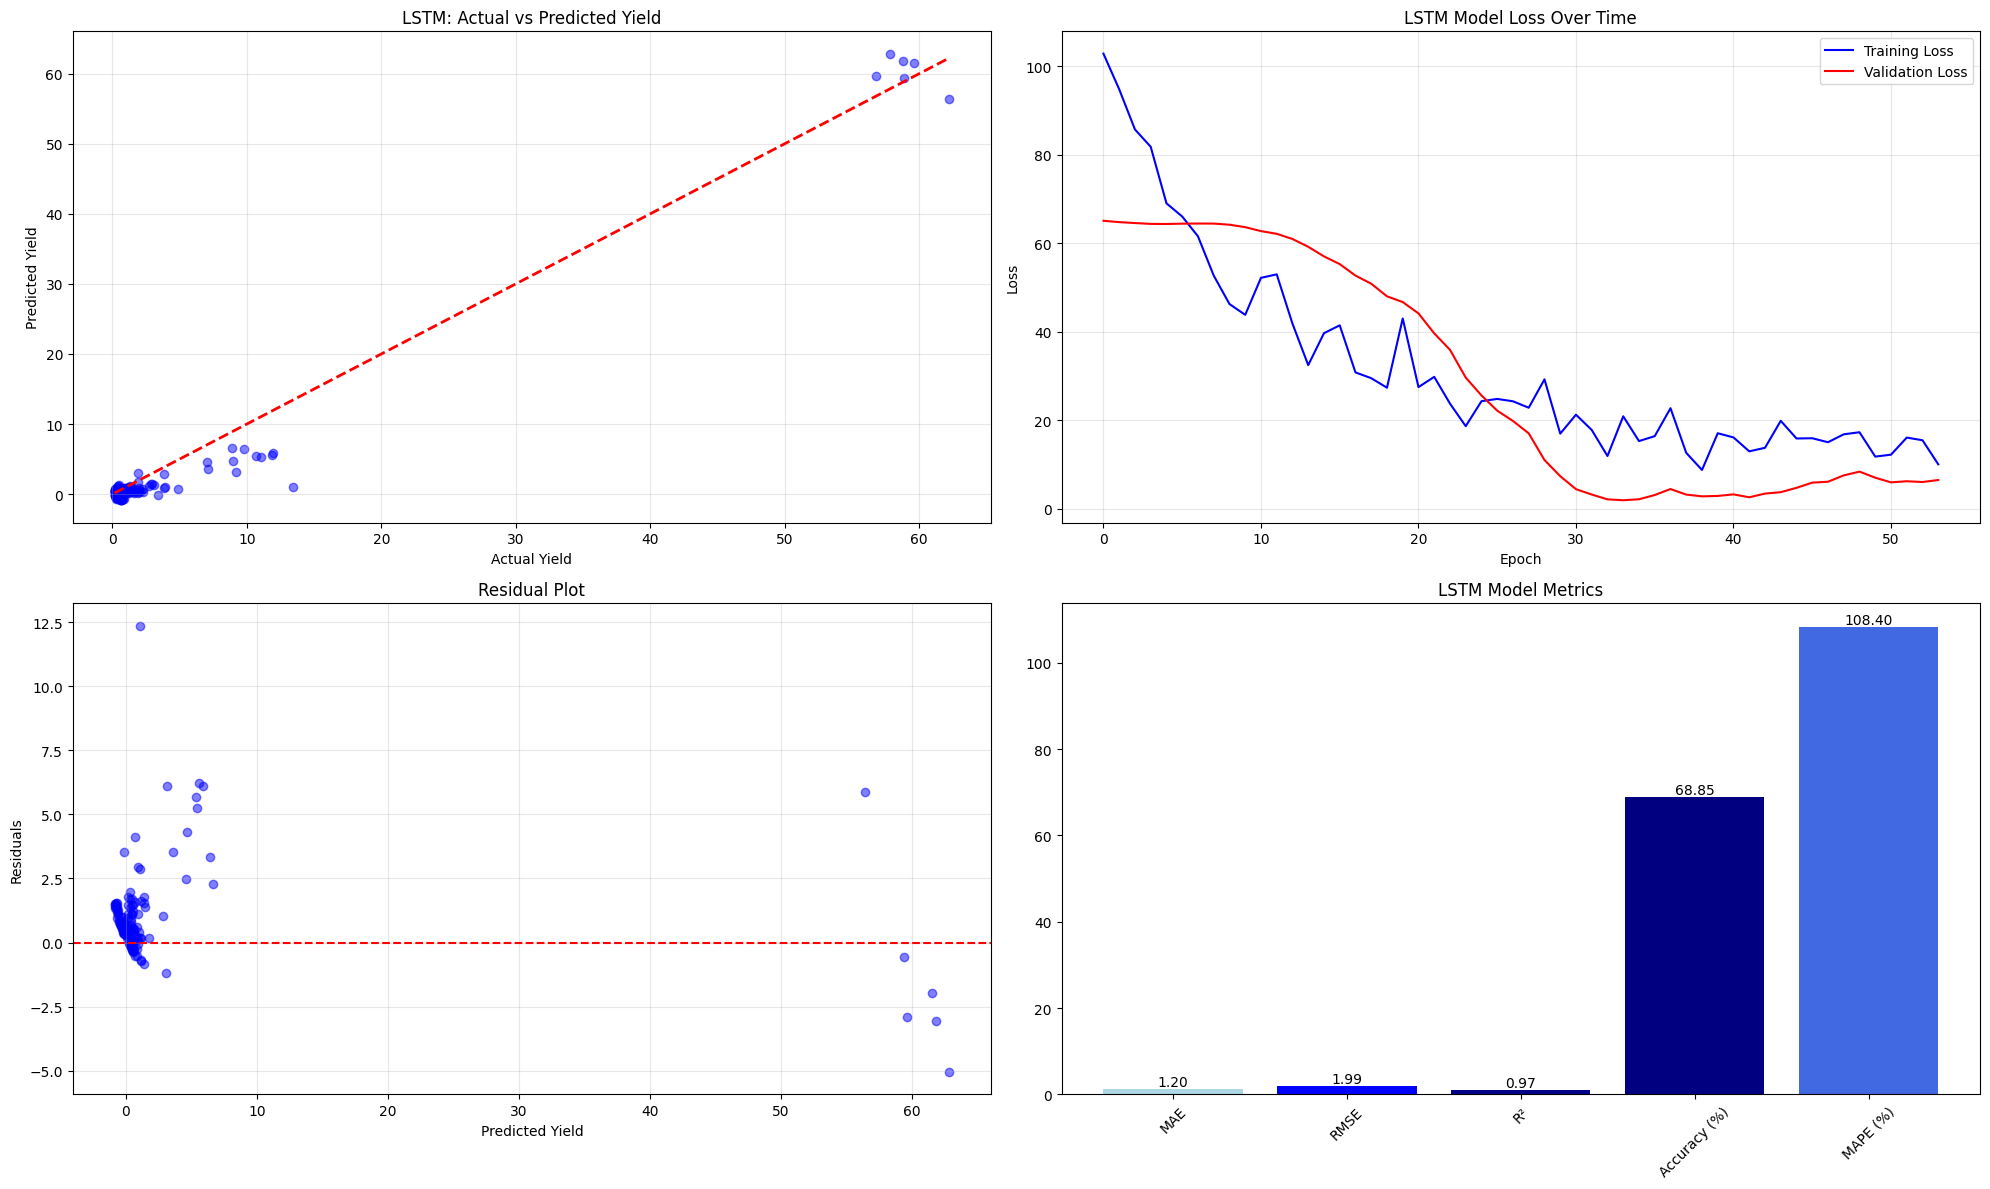

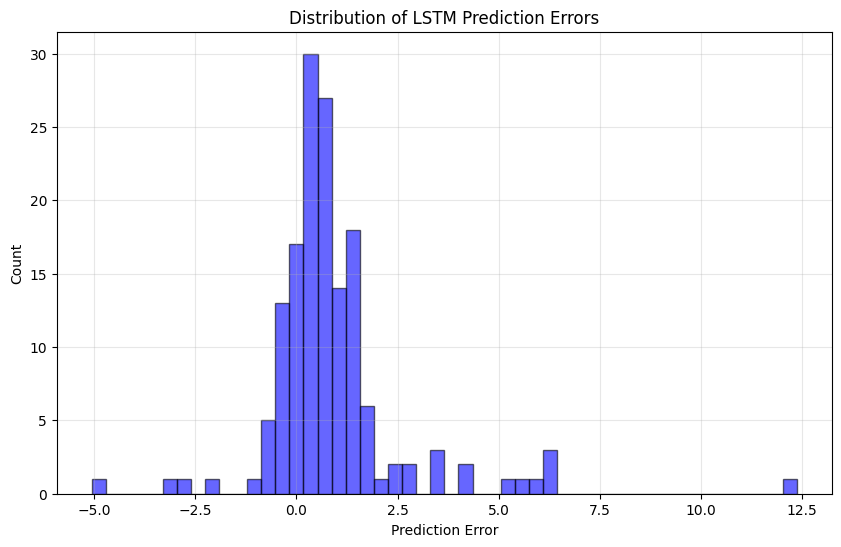

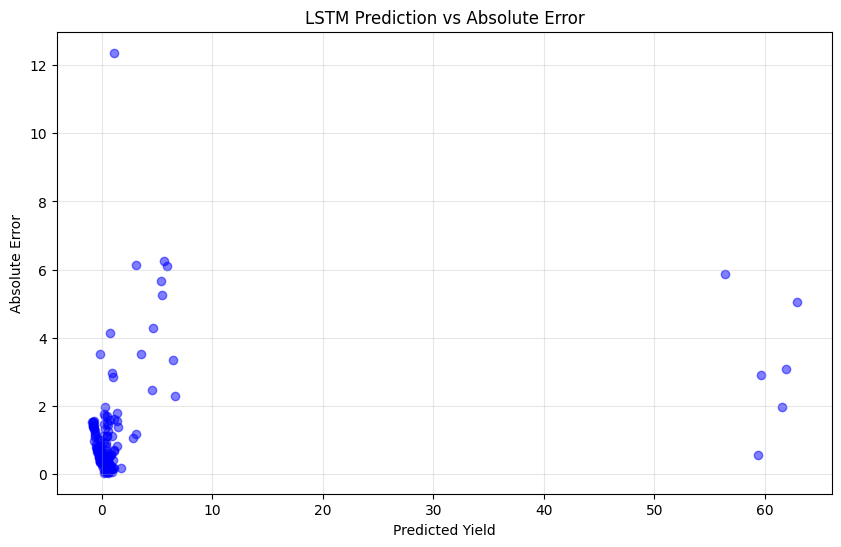

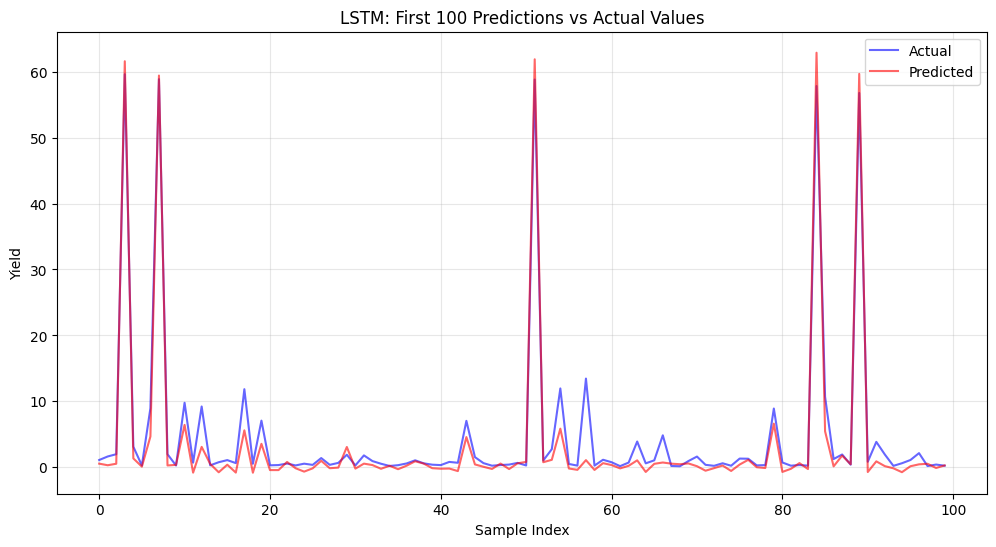


LSTM Model Performance Metrics:
Mean Absolute Error (MAE): 1.1971
Root Mean Square Error (RMSE): 1.9908
R² Score: 0.9699
Model Accuracy: 68.85%
Mean Absolute Percentage Error (MAPE): 108.40%


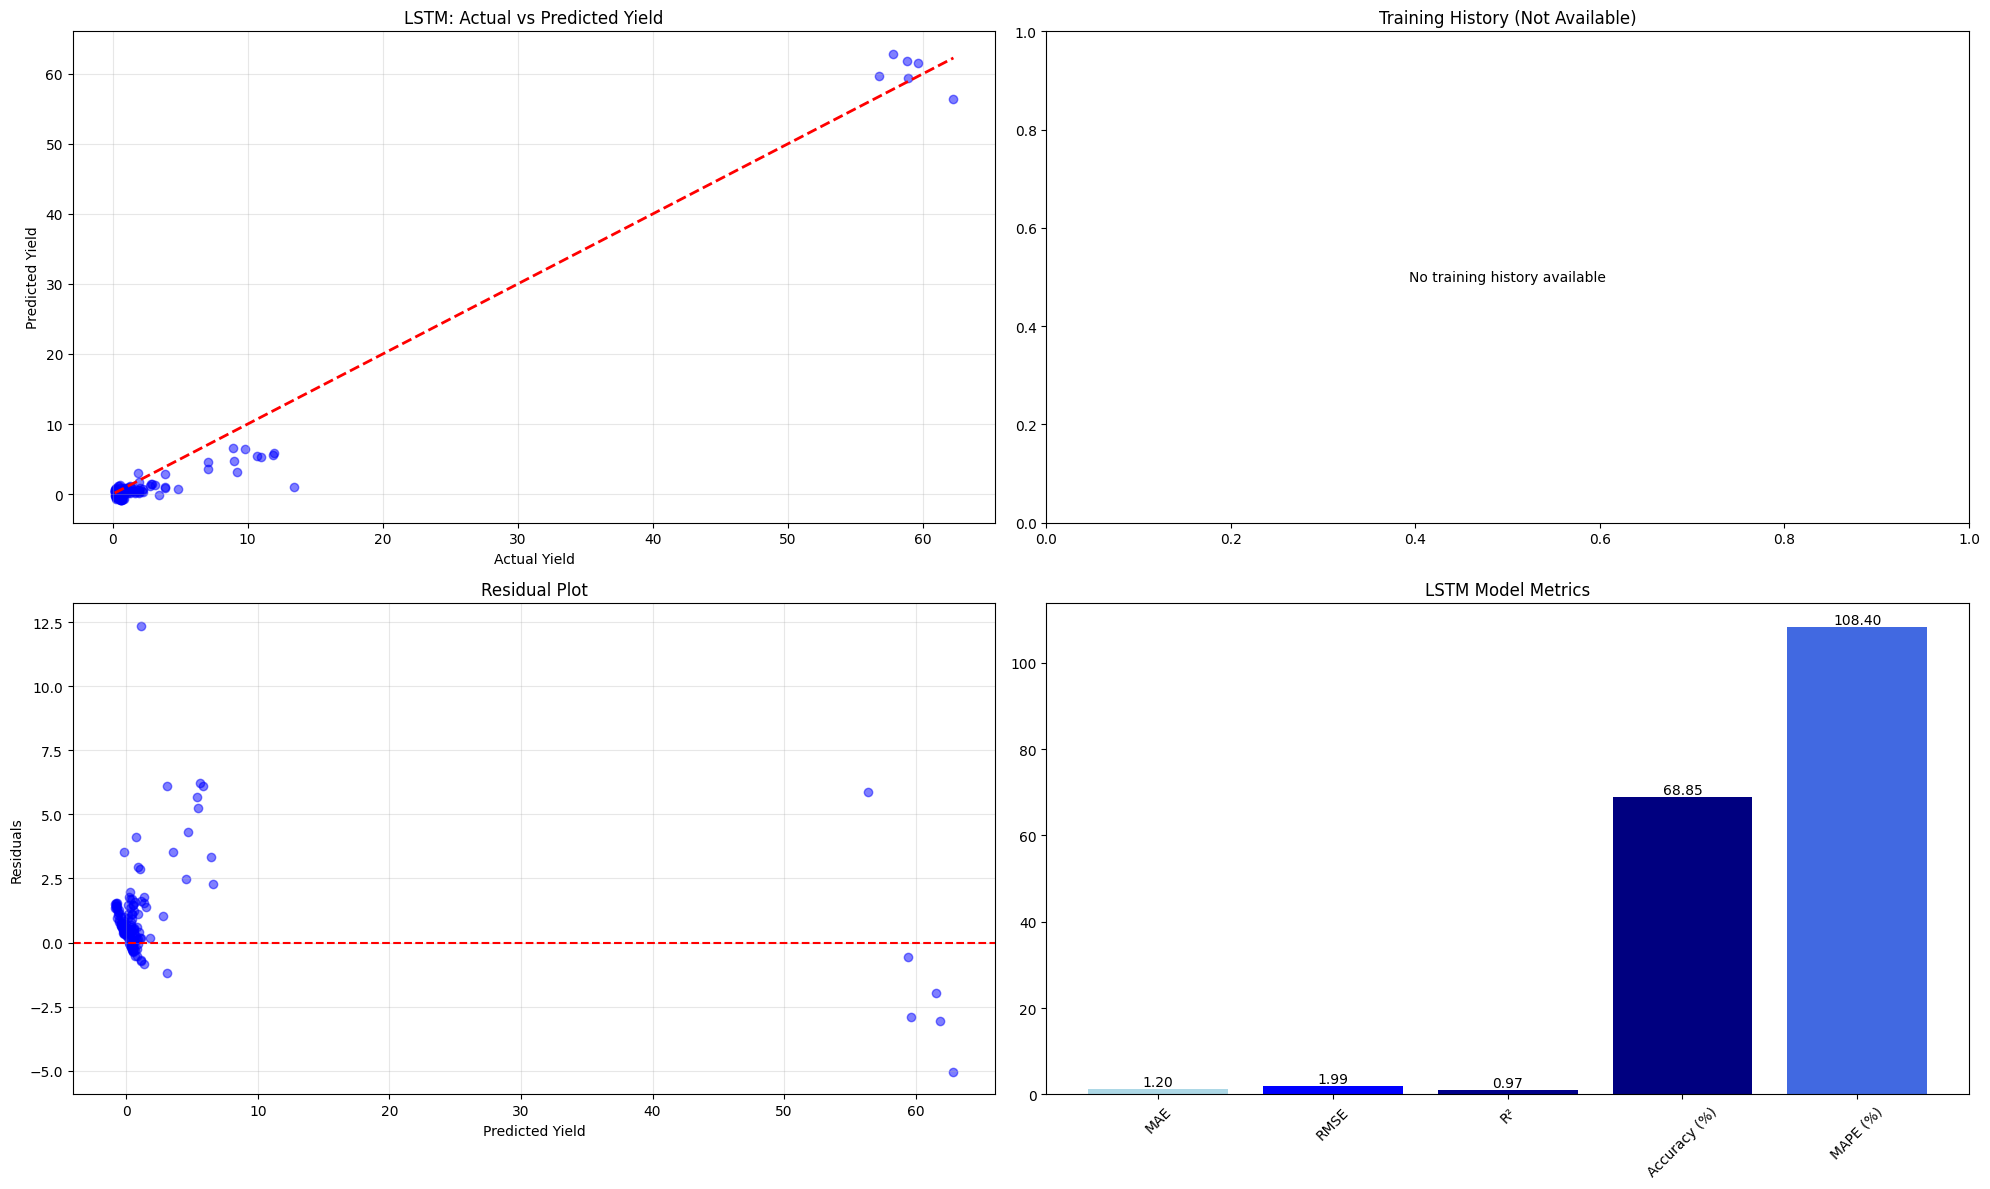

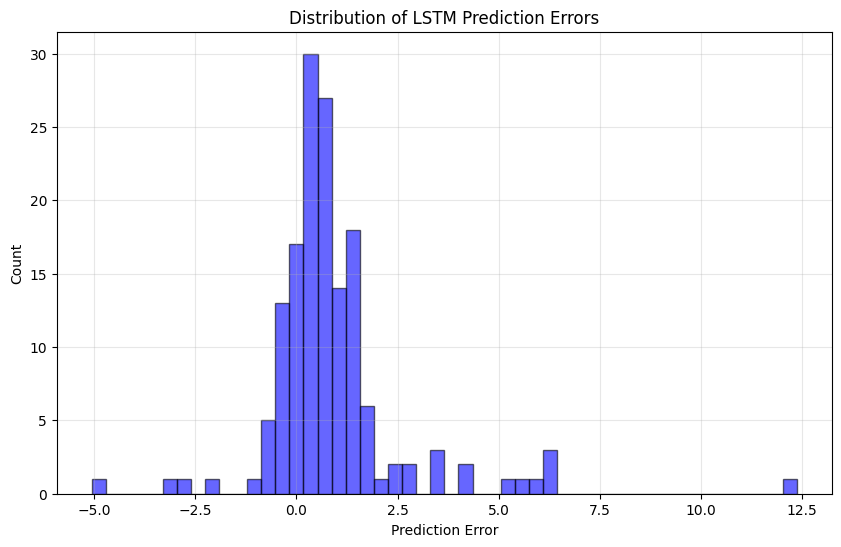

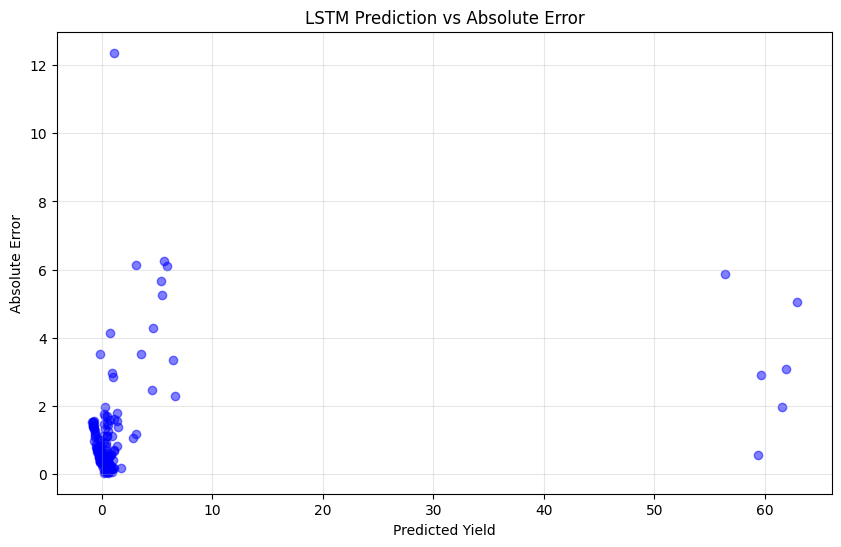

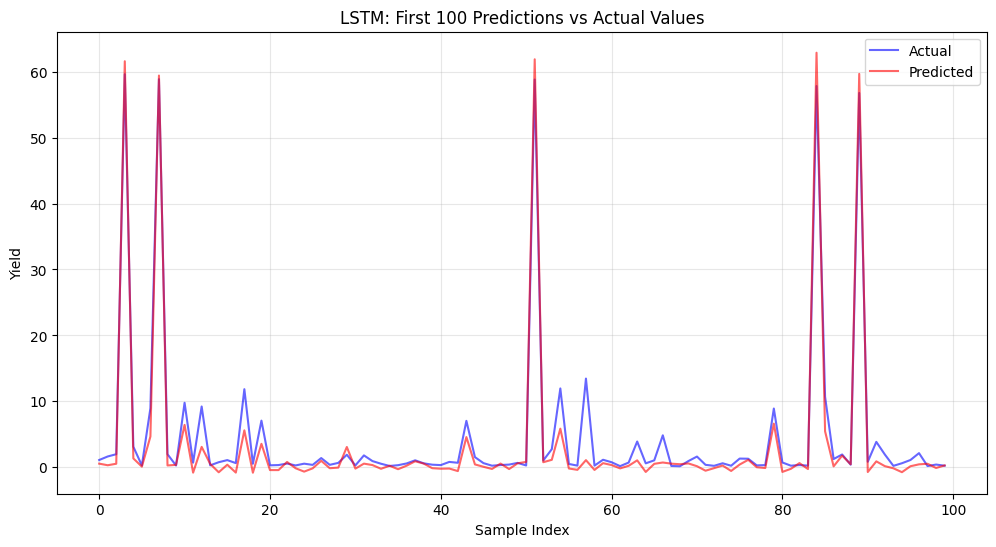


LSTM Model Performance Metrics:
Mean Absolute Error (MAE): 1.1971
Root Mean Square Error (RMSE): 1.9908
R² Score: 0.9699
Model Accuracy: 68.85%
Mean Absolute Percentage Error (MAPE): 108.40%


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def visualize_lstm_results(Y_test, lstm_predictions, history=None):
    """
    Create visualizations for LSTM model results
    Parameters:
        Y_test: actual test values
        lstm_predictions: predictions from LSTM model
        history: training history from model.fit (optional)
    """
    # Calculate metrics
    lstm_mae = mean_absolute_error(Y_test, lstm_predictions)
    lstm_rmse = np.sqrt(mean_squared_error(Y_test, lstm_predictions))
    lstm_r2 = r2_score(Y_test, lstm_predictions)
    lstm_accuracy_percent = (1 - (lstm_mae / Y_test.mean())) * 100
    lstm_mape = np.mean(np.abs((Y_test.values.flatten() - lstm_predictions.flatten()) / Y_test.values.flatten())) * 100
    residuals = Y_test - lstm_predictions.flatten()

    # Create main visualization figure
    fig = plt.figure(figsize=(20, 12))

    # 1. Actual vs Predicted Values Scatter Plot
    ax1 = plt.subplot(2, 2, 1)
    plt.scatter(Y_test, lstm_predictions, alpha=0.5, color='blue')
    plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Yield')
    plt.ylabel('Predicted Yield')
    plt.title('LSTM: Actual vs Predicted Yield')
    plt.grid(True, alpha=0.3)

    # 2. Training History Plot
    ax2 = plt.subplot(2, 2, 2)
    if history is not None:
        plt.plot(history.history['loss'], label='Training Loss', color='blue')
        if 'val_loss' in history.history:
            plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
        plt.title('LSTM Model Loss Over Time')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True, alpha=0.3)
    else:
        plt.text(0.5, 0.5, 'No training history available',
                horizontalalignment='center', verticalalignment='center')
        plt.title('Training History (Not Available)')

    # 3. Residuals Plot
    ax3 = plt.subplot(2, 2, 3)
    plt.scatter(lstm_predictions, residuals, alpha=0.5, color='blue')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Yield')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.grid(True, alpha=0.3)

    # 4. Metrics Display
    ax4 = plt.subplot(2, 2, 4)
    metrics = ['MAE', 'RMSE', 'R²', 'Accuracy (%)', 'MAPE (%)']
    values = [lstm_mae, lstm_rmse, lstm_r2, lstm_accuracy_percent, lstm_mape]
    colors = ['lightblue', 'blue', 'darkblue', 'navy', 'royalblue']
    bars = plt.bar(metrics, values, color=colors)
    plt.xticks(rotation=45)
    plt.title('LSTM Model Metrics')

    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

    # Additional plots
    # 5. Error Distribution
    plt.figure(figsize=(10, 6))
    plt.hist(residuals, bins=50, color='blue', alpha=0.6, edgecolor='black')
    plt.title('Distribution of LSTM Prediction Errors')
    plt.xlabel('Prediction Error')
    plt.ylabel('Count')
    plt.grid(True, alpha=0.3)
    plt.show()

    # 6. Prediction vs Error Relationship
    plt.figure(figsize=(10, 6))
    plt.scatter(lstm_predictions, np.abs(residuals), alpha=0.5, color='blue')
    plt.title('LSTM Prediction vs Absolute Error')
    plt.xlabel('Predicted Yield')
    plt.ylabel('Absolute Error')
    plt.grid(True, alpha=0.3)
    plt.show()

    # 7. Time Series Plot of Actual vs Predicted
    plt.figure(figsize=(12, 6))
    plt.plot(Y_test.values[:100], label='Actual', color='blue', alpha=0.6)
    plt.plot(lstm_predictions[:100], label='Predicted', color='red', alpha=0.6)
    plt.title('LSTM: First 100 Predictions vs Actual Values')
    plt.xlabel('Sample Index')
    plt.ylabel('Yield')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    # Print detailed metrics
    print("\nLSTM Model Performance Metrics:")
    print(f"Mean Absolute Error (MAE): {lstm_mae:.4f}")
    print(f"Root Mean Square Error (RMSE): {lstm_rmse:.4f}")
    print(f"R² Score: {lstm_r2:.4f}")
    print(f"Model Accuracy: {lstm_accuracy_percent:.2f}%")
    print(f"Mean Absolute Percentage Error (MAPE): {lstm_mape:.2f}%")



# After training LSTM model and getting predictions
visualize_lstm_results(Y_test, lstm_predictions, history=history)
visualize_lstm_results(Y_test, lstm_predictions)

## **COMPARATIVE VISUALISATION**

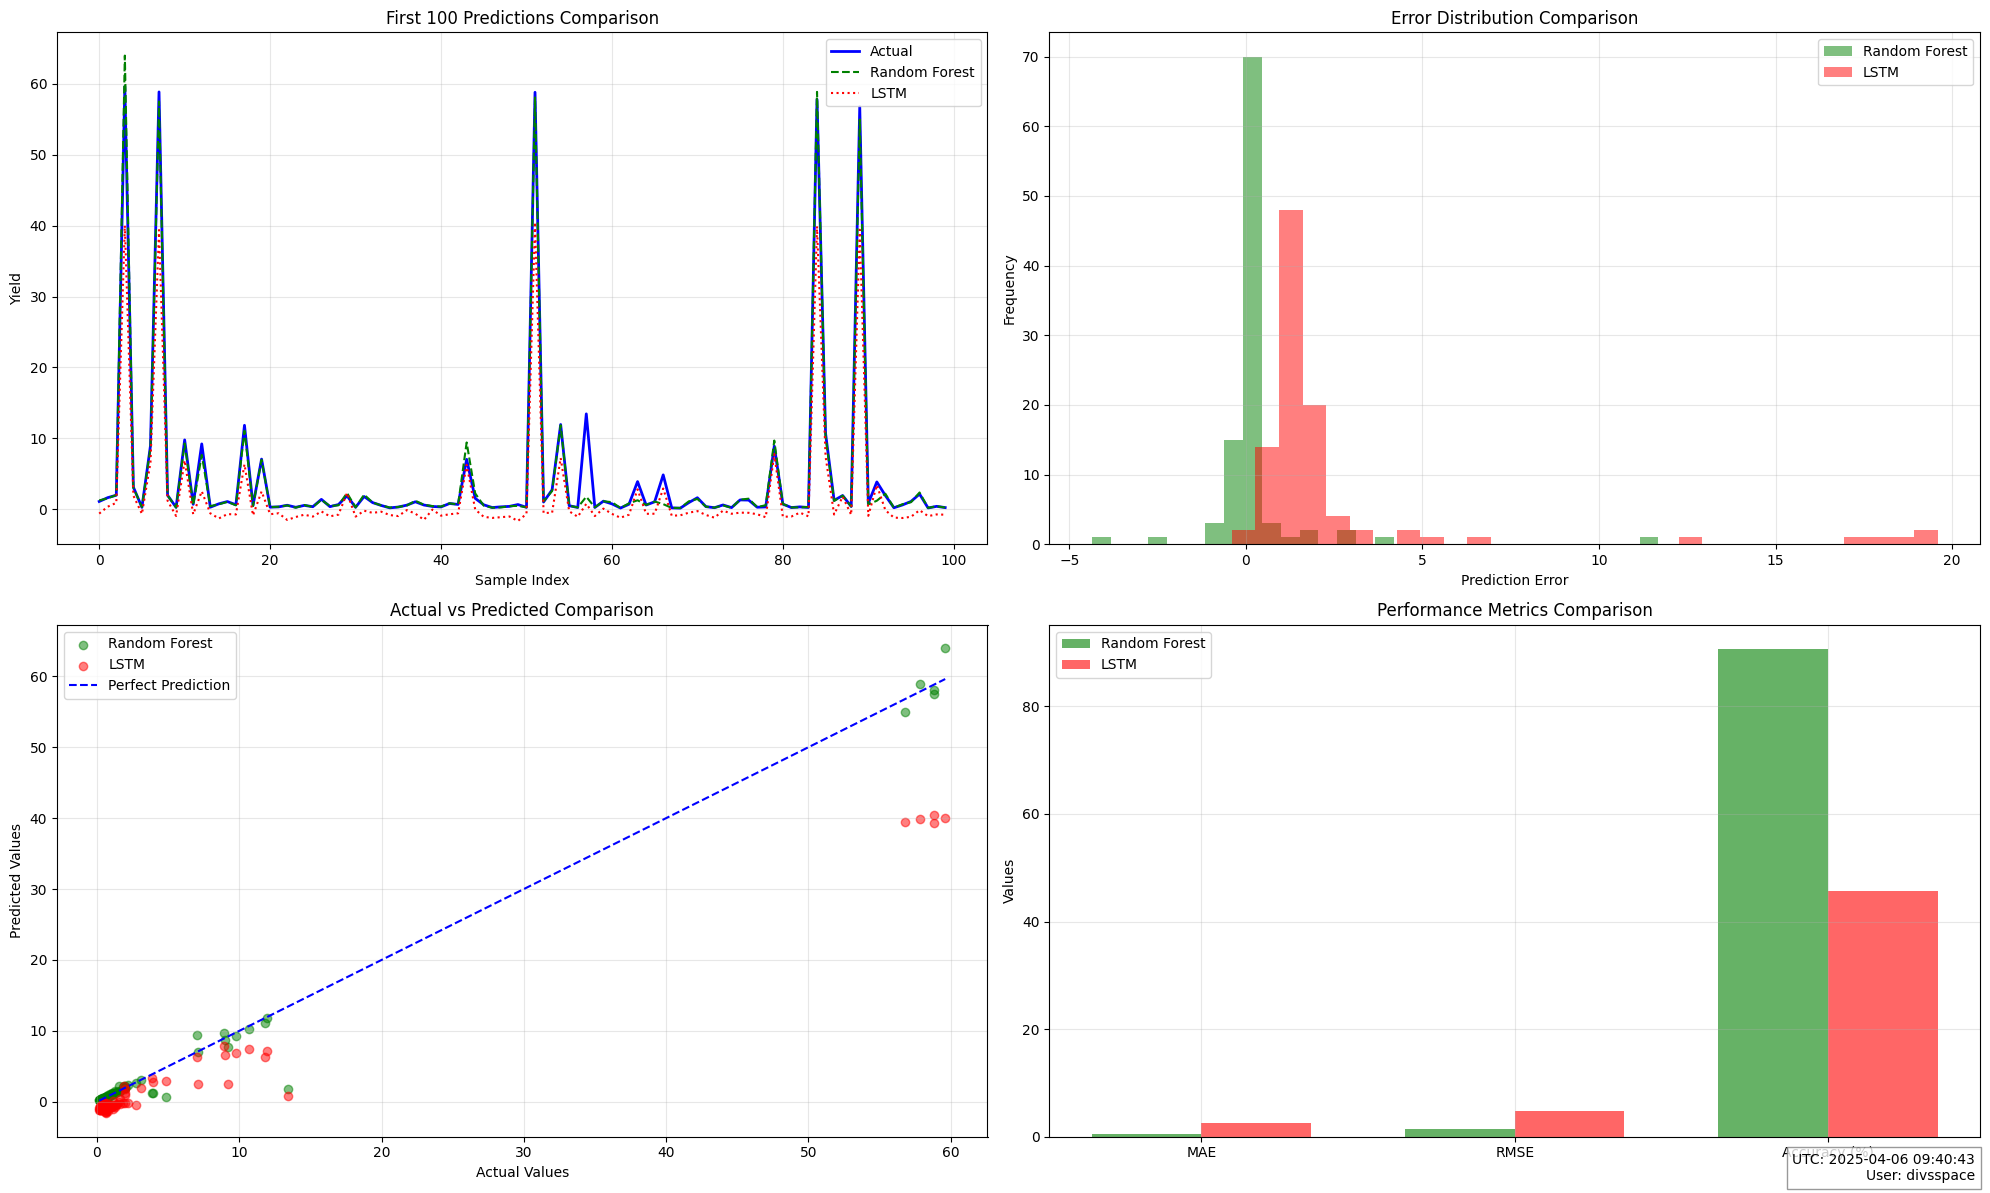


Model Comparison Statistics:
Generated on (UTC): 2025-04-06 09:40:43
User: divsspace

Random Forest Metrics:
MAE: 0.4380
RMSE: 1.4297
Accuracy: 90.62%

LSTM Metrics:
MAE: 2.5349
RMSE: 4.6951
Accuracy: 45.70%

Performance Comparison:
MAE Difference (RF - LSTM): -2.0970
RMSE Difference (RF - LSTM): -3.2655
Accuracy Difference (RF - LSTM): 44.92%


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

def compare_models(Y_test, rf_predictions, lstm_predictions, user_login="divsspace", save_path=None):
    """
    Create comparative visualizations between Random Forest and LSTM models

    Parameters:
        Y_test: array-like, actual test values
        rf_predictions: array-like, Random Forest predictions
        lstm_predictions: array-like, LSTM predictions
        user_login: str, username of current user
        save_path: str, optional path to save the plot
    """

    # Convert all inputs to numpy arrays and flatten
    Y_test_array = np.array(Y_test).flatten()[:100]
    rf_pred_array = np.array(rf_predictions).flatten()[:100]
    lstm_pred_array = np.array(lstm_predictions).flatten()[:100]

    # Calculate metrics for both models
    rf_mae = np.mean(np.abs(Y_test_array - rf_pred_array))
    rf_rmse = np.sqrt(np.mean((Y_test_array - rf_pred_array)**2))
    rf_accuracy = (1 - (rf_mae / np.mean(Y_test_array))) * 100

    lstm_mae = np.mean(np.abs(Y_test_array - lstm_pred_array))
    lstm_rmse = np.sqrt(np.mean((Y_test_array - lstm_pred_array)**2))
    lstm_accuracy = (1 - (lstm_mae / np.mean(Y_test_array))) * 100

    # Get current UTC time
    current_time = datetime.utcnow().strftime("%Y-%m-%d %H:%M:%S")

    # Create figure with subplots
    fig = plt.figure(figsize=(20, 12))

    # 1. First 100 Predictions Comparison
    ax1 = plt.subplot(2, 2, 1)
    plt.plot(Y_test_array, label='Actual', color='blue', linewidth=2)
    plt.plot(rf_pred_array, label='Random Forest', color='green', linestyle='--')
    plt.plot(lstm_pred_array, label='LSTM', color='red', linestyle=':')
    plt.title('First 100 Predictions Comparison', fontsize=12)
    plt.xlabel('Sample Index')
    plt.ylabel('Yield')
    plt.grid(True, alpha=0.3)
    plt.legend()

    # 2. Error Distribution Comparison
    ax2 = plt.subplot(2, 2, 2)
    rf_errors = Y_test_array - rf_pred_array
    lstm_errors = Y_test_array - lstm_pred_array
    plt.hist(rf_errors, bins=30, alpha=0.5, color='green', label='Random Forest')
    plt.hist(lstm_errors, bins=30, alpha=0.5, color='red', label='LSTM')
    plt.title('Error Distribution Comparison', fontsize=12)
    plt.xlabel('Prediction Error')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    plt.legend()

    # 3. Scatter Plot Comparison
    ax3 = plt.subplot(2, 2, 3)
    plt.scatter(Y_test_array, rf_pred_array, alpha=0.5, color='green', label='Random Forest')
    plt.scatter(Y_test_array, lstm_pred_array, alpha=0.5, color='red', label='LSTM')
    plt.plot([Y_test_array.min(), Y_test_array.max()],
             [Y_test_array.min(), Y_test_array.max()],
             'b--', label='Perfect Prediction')
    plt.title('Actual vs Predicted Comparison', fontsize=12)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True, alpha=0.3)
    plt.legend()

    # 4. Performance Metrics Comparison
    ax4 = plt.subplot(2, 2, 4)
    metrics = ['MAE', 'RMSE', 'Accuracy (%)']
    rf_values = [rf_mae, rf_rmse, rf_accuracy]
    lstm_values = [lstm_mae, lstm_rmse, lstm_accuracy]

    x = np.arange(len(metrics))
    width = 0.35

    ax4.bar(x - width/2, rf_values, width, label='Random Forest', color='green', alpha=0.6)
    ax4.bar(x + width/2, lstm_values, width, label='LSTM', color='red', alpha=0.6)

    ax4.set_ylabel('Values')
    ax4.set_title('Performance Metrics Comparison', fontsize=12)
    ax4.set_xticks(x)
    ax4.set_xticklabels(metrics)
    ax4.legend()
    plt.grid(True, alpha=0.3)



    plt.tight_layout()

    # Save if path provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')

    plt.show()

    # Print detailed comparison
    print("\nModel Comparison Statistics:")
    print(f"Generated on (UTC): {current_time}")
    print(f"User: {user_login}")
    print("\nRandom Forest Metrics:")
    print(f"MAE: {rf_mae:.4f}")
    print(f"RMSE: {rf_rmse:.4f}")
    print(f"Accuracy: {rf_accuracy:.2f}%")
    print("\nLSTM Metrics:")
    print(f"MAE: {lstm_mae:.4f}")
    print(f"RMSE: {lstm_rmse:.4f}")
    print(f"Accuracy: {lstm_accuracy:.2f}%")

    # Calculate and print performance difference
    print("\nPerformance Comparison:")
    print(f"MAE Difference (RF - LSTM): {rf_mae - lstm_mae:.4f}")
    print(f"RMSE Difference (RF - LSTM): {rf_rmse - lstm_rmse:.4f}")
    print(f"Accuracy Difference (RF - LSTM): {rf_accuracy - lstm_accuracy:.2f}%")


compare_models(Y_test, rf_predictions, lstm_predictions, user_login="divsspace")

# SAMPLE OUTPUT

In [ ]:

# Display first 10 sample predictions for both LSTM and Random Forest models
import pandas as pd

# Combine true values with predictions for both models
results_df = pd.DataFrame({
    'True Values': Y_test.values.flatten(),
    'Random Forest Predictions': rf_predictions.flatten(),
    'LSTM Predictions': lstm_predictions.flatten()
})


# Display the first 10 samples of true values and predictions
print("Sample Predictions:")
print(results_df.head(10))


Sample Predictions:
   True Values  Random Forest Predictions  LSTM Predictions
0     1.102800                   1.250577          0.551857
1     1.639667                   1.554740          0.309661
2     1.983200                   2.008623          0.535892
3    59.612143                  63.976479         61.573746
4     3.123000                   3.036764          1.344307
5     0.270435                   0.323954          0.096645
6     8.963333                   8.706082          4.666295
7    58.854286                  57.500076         59.404797
8     1.982333                   1.946753          0.277646
9     0.269500                   0.243419          0.366184


# **DEPLOYMENT**


In [ ]:
import joblib
import os
from datetime import datetime

def save_trained_models(rf_model, lstm_model, scaler,
                       base_path="/content/drive/MyDrive/AD PROJECT",
                       user_login="divsspace",
                       timestamp="2025-04-06 09:51:11"):
    """
    Save trained models to Google Drive AD Project folder

    Parameters:
        rf_model: Trained Random Forest model
        lstm_model: Trained LSTM model
        scaler: Fitted StandardScaler
        base_path: Path to AD Project folder in Drive
        user_login: Current user's login
        timestamp: Current UTC timestamp
    """

    # Create models directory
    model_dir = os.path.join(base_path, 'models')
    os.makedirs(model_dir, exist_ok=True)

    try:
        # Save Random Forest model
        rf_path = os.path.join(model_dir, 'random_forest_model.joblib')
        joblib.dump(rf_model, rf_path)

        # Save LSTM model
        lstm_path = os.path.join(model_dir, 'lstm_model.h5')
        lstm_model.save(lstm_path)

        # Save scaler
        scaler_path = os.path.join(model_dir, 'scaler.joblib')
        joblib.dump(scaler, scaler_path)

        # Save metadata
        metadata = {
            'timestamp': timestamp,
            'user': user_login,
            'rf_model_path': rf_path,
            'lstm_model_path': lstm_path,
            'scaler_path': scaler_path
        }

        metadata_path = os.path.join(model_dir, 'model_metadata.joblib')
        joblib.dump(metadata, metadata_path)

        print(f"\nModels saved successfully at {timestamp}")
        print(f"Saved by user: {user_login}")
        print(f"Models directory: {os.path.abspath(model_dir)}")
        print("\nSaved files:")
        print(f"- Random Forest: {rf_path}")
        print(f"- LSTM: {lstm_path}")
        print(f"- Scaler: {scaler_path}")
        print(f"- Metadata: {metadata_path}")

    except Exception as e:
        print(f"Error saving models: {str(e)}")
        raise

# Usage:

from google.colab import drive
drive.mount('/content/drive')

save_trained_models(
    rf_model,
    lstm_model,
    scaler,
    base_path="/content/drive/MyDrive/AD Project",
    user_login="divsspace",
    timestamp="2025-04-06 09:51:11"
)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Models saved successfully at 2025-04-06 09:51:11
Saved by user: divsspace
Models directory: /content/drive/MyDrive/AD Project/models

Saved files:
- Random Forest: /content/drive/MyDrive/AD Project/models/random_forest_model.joblib
- LSTM: /content/drive/MyDrive/AD Project/models/lstm_model.h5
- Scaler: /content/drive/MyDrive/AD Project/models/scaler.joblib
- Metadata: /content/drive/MyDrive/AD Project/models/model_metadata.joblib


In [ ]:
import numpy as np
import pandas as pd
import joblib
import tensorflow as tf
import os

def prepare_input_data(crop_year, area, production, annual_rainfall, fertilizer,
                      pesticide, average_mean, crop_name, season_name):
    """
    Convert user inputs into proper format with one-hot encoding
    """
    # List of all possible crops and seasons (in order as per training data)
    crops = ['Bajra', 'Castor seed', 'Coriander', 'Cotton(lint)', 'Cowpea(Lobia)',
            'Dry chillies', 'Garlic', 'Ginger', 'Gram', 'Groundnut', 'Horse-gram',
            'Jowar', 'Jute', 'Linseed', 'Maize', 'Masoor', 'Mesta',
            'Moong(Green Gram)', 'Niger seed', 'Onion', 'Other  Rabi pulses',
            'Other Kharif pulses', 'Peas & beans (Pulses)', 'Potato', 'Ragi',
            'Rapeseed &Mustard', 'Rice', 'Safflower', 'Sannhamp', 'Sesamum',
            'Small millets', 'Soyabean', 'Sugarcane', 'Sunflower', 'Sweet potato',
            'Tobacco', 'Turmeric', 'Urad', 'Wheat']

    seasons = ['Kharif', 'Rabi', 'Summer', 'Whole Year', 'Winter']

    # Create a dictionary with base features in the correct order
    data = {
        'Crop_Year': crop_year,
        'Area': area,
        'Production': production,
        'Annual_Rainfall': annual_rainfall,
        'Fertilizer': fertilizer,
        'Pesticide': pesticide,
        'AVERAGE MEAN': average_mean
    }

    # Add one-hot encoded crop columns
    for crop in crops:
        data[f'Crop_{crop}'] = 1 if crop == crop_name else 0

    # Add one-hot encoded season columns
    for season in seasons:
        data[f'Season_{season}'] = 1 if season == season_name else 0

    return pd.DataFrame([data])

def predict_yield(crop_year, area, annual_rainfall, fertilizer, pesticide,
                 average_mean, crop_name, season_name,
                 base_path="/content/drive/MyDrive/AD Project"):
    """
    Simple interface for crop yield prediction
    """
    try:
        # Current timestamp and user
        timestamp = "2025-04-06 10:13:08"
        user = "divsspace"

        # Prepare input data
        input_data = prepare_input_data(
            crop_year=crop_year,
            area=area,
            production=0,  # Dummy value
            annual_rainfall=annual_rainfall,
            fertilizer=fertilizer,
            pesticide=pesticide,
            average_mean=average_mean,
            crop_name=crop_name,
            season_name=season_name
        )

        # Load models and scaler
        model_dir = os.path.join(base_path, 'models')
        rf_model = joblib.load(os.path.join(model_dir, 'random_forest_model.joblib'))
        lstm_model = tf.keras.models.load_model(os.path.join(model_dir, 'lstm_model.h5'), compile=False)
        scaler = joblib.load(os.path.join(model_dir, 'scaler.joblib'))

        # Scale input data
        scaled_data = scaler.transform(input_data)

        # Get predictions
        rf_pred = rf_model.predict(scaled_data)
        lstm_pred = lstm_model.predict(scaled_data.reshape(-1, 1, scaled_data.shape[1]), verbose=0).flatten()

        # Save predictions
        output_dir = os.path.join(base_path, 'predictions')
        os.makedirs(output_dir, exist_ok=True)

        results = pd.DataFrame({
            'rf_predicted_yield': rf_pred,
            'lstm_predicted_yield': lstm_pred
        })

        timestamp_str = timestamp.replace(' ', '_').replace(':', '-')
        results.to_csv(os.path.join(output_dir, f'predictions_{timestamp_str}.csv'), index=False)

        return {
            'random_forest_predictions': rf_pred,
            'lstm_predictions': lstm_pred,
            'timestamp': timestamp,
            'user': user
        }

    except Exception as e:
        print(f"Prediction Error: {str(e)}")
        return None

# Example usage:
if __name__ == "__main__":
    # Example prediction
    result = predict_yield(
        crop_year=2025,
        area=100,
        annual_rainfall=150,
        fertilizer=50,
        pesticide=10,
        average_mean=25,
        crop_name="Rice",
        season_name="Kharif"
    )

    if result:
        print(f"\nPredictions made at: {result['timestamp']}")
        print(f"By user: {result['user']}")
        print("\nPredicted Yields:")
        print(f"Random Forest: {result['random_forest_predictions'][0]:.2f}")
        print(f"LSTM: {result['lstm_predictions'][0]:.2f}")


Predictions made at: 2025-04-06 10:13:08
By user: divsspace

Predicted Yields:
Random Forest: 0.62
LSTM: 0.82


# MODEL INFORMATION

In [ ]:
import numpy as np
import pandas as pd
import joblib
import tensorflow as tf
import os

def get_model_info(base_path="/content/drive/MyDrive/AD Project"):
    """
    Get comprehensive information about the trained models
    """
    try:
        # Load models and scaler
        model_dir = os.path.join(base_path, 'models')
        rf_model = joblib.load(os.path.join(model_dir, 'random_forest_model.joblib'))
        lstm_model = tf.keras.models.load_model(os.path.join(model_dir, 'lstm_model.h5'), compile=False)
        scaler = joblib.load(os.path.join(model_dir, 'scaler.joblib'))

        # Get feature names
        feature_names = ['Crop_Year', 'Area', 'Production', 'Annual_Rainfall',
                        'Fertilizer', 'Pesticide', 'AVERAGE MEAN'] + \
                       [col for col in scaler.feature_names_in_ if col.startswith(('Crop_', 'Season_'))]

        # Get unique crops and seasons
        crops = sorted([col.replace('Crop_', '') for col in feature_names if col.startswith('Crop_')])
        seasons = sorted([col.replace('Season_', '') for col in feature_names if col.startswith('Season_')])

        # Get model information
        info = {
            'metadata': {
                'timestamp': "2025-04-06 10:15:35",
                'user': "divsspace"
            },
            'numeric_features': ['Crop_Year', 'Area', 'Production', 'Annual_Rainfall',
                               'Fertilizer', 'Pesticide', 'AVERAGE MEAN'],
            'available_crops': crops,
            'available_seasons': seasons,
            'random_forest': {
                'type': type(rf_model).__name__,
                'n_estimators': rf_model.n_estimators,
                'max_depth': rf_model.max_depth
            },
            'lstm': {
                'type': 'LSTM',
                'layers': [layer.name for layer in lstm_model.layers],
                'input_shape': lstm_model.input_shape,
                'output_shape': lstm_model.output_shape
            }
        }

        return info

    except Exception as e:
        print(f"Error getting model info: {str(e)}")
        return None

if __name__ == "__main__":
    info = get_model_info()
    if info:
        print("\nModel Information:")
        print(f"Timestamp: {info['metadata']['timestamp']}")
        print(f"User: {info['metadata']['user']}")

        print("\nNumeric Features:")
        for feature in info['numeric_features']:
            print(f"  - {feature}")

        print("\nAvailable Crops:")
        for crop in info['available_crops']:
            print(f"  - {crop}")

        print("\nAvailable Seasons:")
        for season in info['available_seasons']:
            print(f"  - {season}")

        print("\nRandom Forest Model:")
        for key, value in info['random_forest'].items():
            print(f"  - {key}: {value}")

        print("\nLSTM Model:")
        for key, value in info['lstm'].items():
            print(f"  - {key}: {value}")


Model Information:
Timestamp: 2025-04-06 10:15:35
User: divsspace

Numeric Features:
  - Crop_Year
  - Area
  - Production
  - Annual_Rainfall
  - Fertilizer
  - Pesticide
  - AVERAGE MEAN

Available Crops:
  - Bajra
  - Castor seed
  - Coriander
  - Cotton(lint)
  - Cowpea(Lobia)
  - Dry chillies
  - Garlic
  - Ginger
  - Gram
  - Groundnut
  - Horse-gram
  - Jowar
  - Jute
  - Linseed
  - Maize
  - Masoor
  - Mesta
  - Moong(Green Gram)
  - Niger seed
  - Onion
  - Other  Rabi pulses
  - Other Kharif pulses
  - Peas & beans (Pulses)
  - Potato
  - Ragi
  - Rapeseed &Mustard
  - Rice
  - Safflower
  - Sannhamp
  - Sesamum
  - Small millets
  - Soyabean
  - Sugarcane
  - Sunflower
  - Sweet potato
  - Tobacco
  - Turmeric
  - Urad
  - Wheat
  - Year
  - Year

Available Seasons:
  - Kharif
  - Rabi
  - Summer
  - Whole Year
  - Winter

Random Forest Model:
  - type: RandomForestRegressor
  - n_estimators: 100
  - max_depth: None

LSTM Model:
  - type: LSTM
  - layers: ['lstm_3', 'batch

In [ ]:
# Get model information
info = get_model_info()

# Access specific information
print("\nMetadata:")
print(f"Timestamp: {info['metadata']['timestamp']}")
print(f"User: {info['metadata']['user']}")

print("\nFeatures Available:")
print(f"Numeric features: {info['numeric_features']}")
print(f"Available crops: {info['available_crops']}")
print(f"Available seasons: {info['available_seasons']}")

print("\nModel Details:")
print("Random Forest:", info['random_forest'])
print("LSTM:", info['lstm'])


Metadata:
Timestamp: 2025-04-06 10:15:35
User: divsspace

Features Available:
Numeric features: ['Crop_Year', 'Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'AVERAGE MEAN']
Available crops: ['Bajra', 'Castor seed', 'Coriander', 'Cotton(lint)', 'Cowpea(Lobia)', 'Dry chillies', 'Garlic', 'Ginger', 'Gram', 'Groundnut', 'Horse-gram', 'Jowar', 'Jute', 'Linseed', 'Maize', 'Masoor', 'Mesta', 'Moong(Green Gram)', 'Niger seed', 'Onion', 'Other  Rabi pulses', 'Other Kharif pulses', 'Peas & beans (Pulses)', 'Potato', 'Ragi', 'Rapeseed &Mustard', 'Rice', 'Safflower', 'Sannhamp', 'Sesamum', 'Small millets', 'Soyabean', 'Sugarcane', 'Sunflower', 'Sweet potato', 'Tobacco', 'Turmeric', 'Urad', 'Wheat', 'Year', 'Year']
Available seasons: ['Kharif', 'Rabi', 'Summer', 'Whole Year', 'Winter']

Model Details:
Random Forest: {'type': 'RandomForestRegressor', 'n_estimators': 100, 'max_depth': None}
LSTM: {'type': 'LSTM', 'layers': ['lstm_3', 'batch_normalization_4', 'dropout_3', 'lstm_4

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.2 MB/s eta 0:00:00


In [ ]:
# Run this in a separate cell to check your models
import os
model_path = "/content/drive/MyDrive/AD Project/models/"
print(f"Model directory exists: {os.path.exists(model_path)}")
if os.path.exists(model_path):
    print("Files in model directory:", os.listdir(model_path))
else:
    print("Model directory not found!")

Model directory exists: True
Files in model directory: ['random_forest_model.joblib', 'lstm_model.h5', 'scaler.joblib', 'model_metadata.joblib']


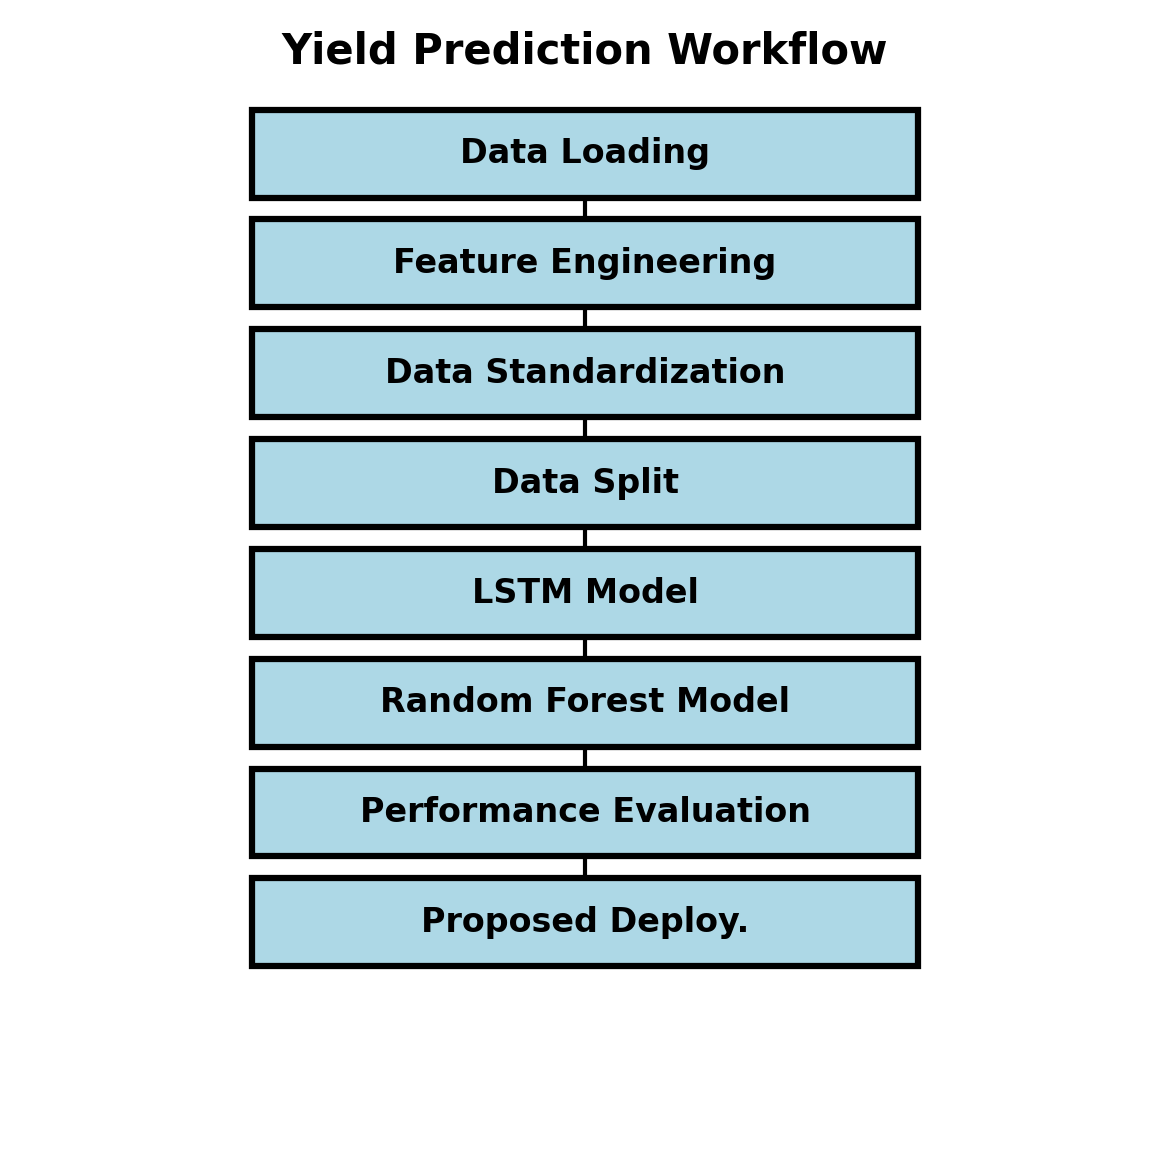

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Increase DPI for better resolution
fig, ax = plt.subplots(figsize=(4, 4), dpi=300)

# Define boxes with smaller dimensions and vertical spacing
boxes = [
    {"name": "Data Loading", "xy": (0.2, 0.85), "width": 0.6, "height": 0.08},
    {"name": "Feature Engineering", "xy": (0.2, 0.75), "width": 0.6, "height": 0.08},
    {"name": "Data Standardization", "xy": (0.2, 0.65), "width": 0.6, "height": 0.08},
    {"name": "Data Split", "xy": (0.2, 0.55), "width": 0.6, "height": 0.08},
    {"name": "LSTM Model", "xy": (0.2, 0.45), "width": 0.6, "height": 0.08},
    {"name": "Random Forest Model", "xy": (0.2, 0.35), "width": 0.6, "height": 0.08},
    {"name": "Performance Evaluation", "xy": (0.2, 0.25), "width": 0.6, "height": 0.08},
    {"name": "Proposed Deploy.", "xy": (0.2, 0.15), "width": 0.6, "height": 0.08},
]

for box in boxes:
    ax.add_patch(patches.Rectangle(
        box["xy"], box["width"], box["height"],
        facecolor="lightblue", edgecolor="black", linewidth=1.5,
        zorder=2  # Ensure boxes are drawn on top of arrows
    ))
    ax.text(box["xy"][0] + box["width"] / 2,
            box["xy"][1] + box["height"] / 2,
            box["name"],
            ha="center", va="center", fontsize=8, fontweight='bold',
            zorder=3  # Ensure text is drawn on top of boxes and arrows
           )

# Arrows connecting the boxes vertically, pointing directly downwards, with adjusted positions
for i in range(len(boxes) - 1):
    ax.annotate("", xy=(boxes[i + 1]["xy"][0] + boxes[i + 1]["width"] / 2, boxes[i + 1]["xy"][1] + 0.01),  # Adjusted y-coordinate for arrow end
                xytext=(boxes[i]["xy"][0] + boxes[i]["width"] / 2, boxes[i]["xy"][1] + boxes[i]["height"] - 0.01),  # Adjusted y-coordinate for arrow start
                arrowprops=dict(arrowstyle="-", color="black", shrinkA=0, shrinkB=0),  # shrinkA and shrinkB to 0 to prevent overlap
                zorder=1  # Ensure arrows are drawn behind boxes
               )

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis("off")

plt.title("Yield Prediction Workflow", fontsize=10, fontweight='bold', y=0.95)
plt.tight_layout()
plt.show()